In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df_olist = pd.read_csv('./dataset/df_olist_clean.csv')

#### **4. Exploratory Data Analysis (EDA)**

we will do an exploratory Data Analysis on the Brazilian eCommerce dataset to gain more insight for business problem. There are some important questions to consider. These questions are divided into various categories to ensure a comprehensive analysis of customer behavior, purchase patterns, and other relevant aspects that can provide actionable insights for business purposes.

##### **4.1. Customers Distribution Based on Purchases Frequency**

This analysis aims to evaluate the distribution of customers based on their purchase frequency, distinguishing between one-time buyers and repeat buyers. the goals is to knows the customer purchase behavior, such as factors that influence customers to make repeat purchases or why some customers only make a single purchase.

    4.1.1 One-time Vs Repeat Buyers Distribution

one-time customer is the customer who only make 1 order purchasement during period of 2016 to 2018. While the repeat customers is the customer who already make a repeat order after the first purchasement.

In [3]:
# Group by 'customer_unique_id' and count distinct 'order_id'
customer_order_counts = df_olist.groupby('customer_unique_id')['order_id'].nunique()

one_customers_ids = customer_order_counts[customer_order_counts == 1].index

repeat_customers_ids = customer_order_counts[customer_order_counts > 1].index

one_customers = df_olist[df_olist['customer_unique_id'].isin(one_customers_ids)]

repeat_customers = df_olist[df_olist['customer_unique_id'].isin(repeat_customers_ids)]

,Customer Type,Count
0,one-Time Customers,89356
1,Repeat Customers,2742


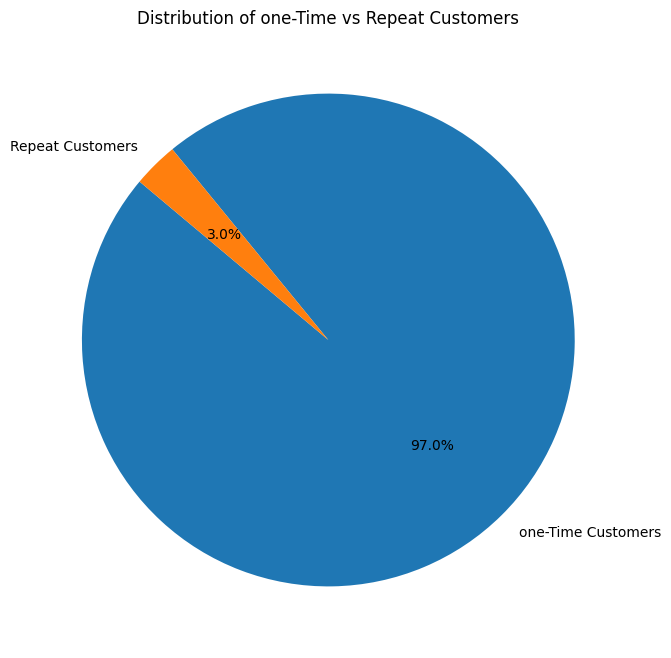

In [4]:
one_customers_count = one_customers['customer_unique_id'].nunique()
repeat_customers_count = repeat_customers['customer_unique_id'].nunique()

data = {
    'Customer Type': ['one-Time Customers', 'Repeat Customers'],
    'Count': [one_customers_count, repeat_customers_count]
}

one_and_repeat_customers = pd.DataFrame(data)

display(one_and_repeat_customers)

plt.figure(figsize=(8, 8))
plt.pie(one_and_repeat_customers['Count'], labels=one_and_repeat_customers['Customer Type'], autopct='%1.1f%%', startangle=140)
plt.title('Distribution of one-Time vs Repeat Customers')
plt.show()


Summary Insight : 

- The data analysis shows that 97 % of it is a one-time customers that make only one time purchasement through 2016 - 2018 while there is only 3 % of customers classify as repeat buyers. Although there are many new customers, the number of repeat customers is significantly smaller. The customer retention rate check in the next chapter will provide deeper insights into how effective the current retention strategies are and how the company can enhance customer loyalty to turn new customers into repeat customers.

    4.1.2 one-time Customers Single Items Vs Multiple Items

In [5]:
customer_items_counts = one_customers.groupby('customer_unique_id')['order_id'].count()

single_item_ids = customer_items_counts[customer_items_counts == 1].index
multiple_item_ids = customer_items_counts[customer_items_counts > 1].index

single_item_customers = one_customers[one_customers['customer_unique_id'].isin(single_item_ids)]

multi_item_customers = one_customers[one_customers['customer_unique_id'].isin(multiple_item_ids)]


,Customer Type,Count
0,Single Item Purchase,78220
1,Multi Item Purchase,11136


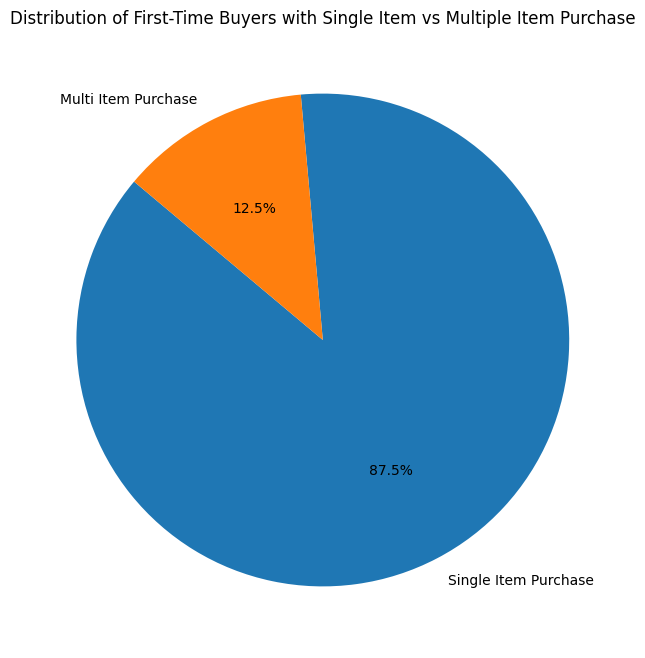

In [6]:
single_item_customers_count = single_item_customers['customer_unique_id'].nunique()
multi_item_customers_count = multi_item_customers ['customer_unique_id'].nunique()

data = {
    'Customer Type': ['Single Item Purchase', 'Multi Item Purchase'],
    'Count': [single_item_customers_count, multi_item_customers_count]
}

single_and_multiple = pd.DataFrame(data)

display(single_and_multiple)

plt.figure(figsize=(8, 8))
plt.pie(single_and_multiple ['Count'], labels=single_and_multiple ['Customer Type'], autopct='%1.1f%%', startangle=140)
plt.title('Distribution of First-Time Buyers with Single Item vs Multiple Item Purchase')
plt.show()

##### **4.2. Customer Purchase Frequency Based On Product Category** 


This analysis aims to calculate the frequency of purchases for different product categories. The goal is to understand how often customers buy products within each category and to identify any patterns or trends related to product preferences, category popularity, or potential market demand.

    4.2.1 One-Time Buyers Purchase Frequency Based On Product Category

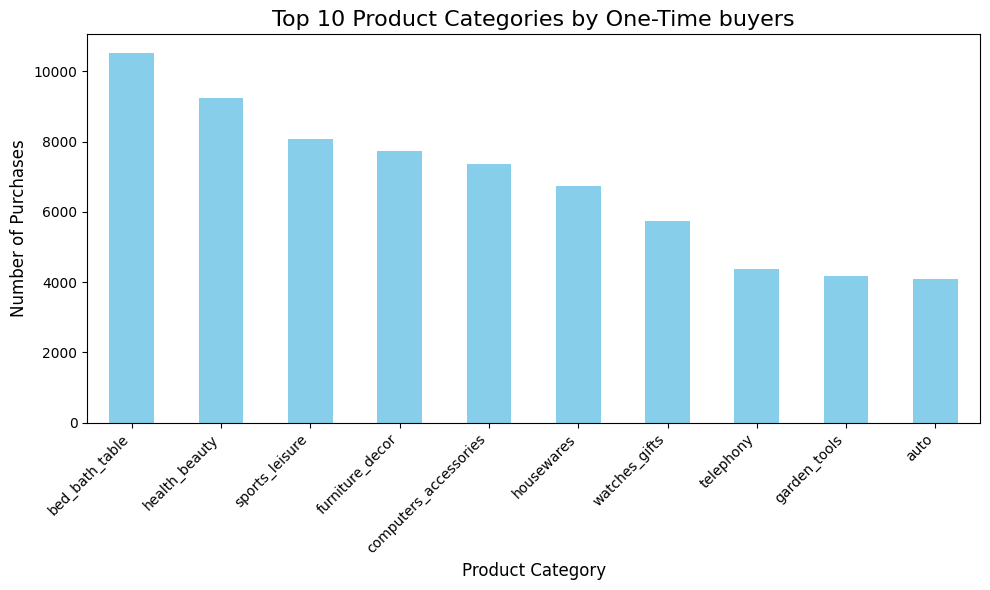

In [7]:
# 1. Get the product_category_name frequency
one_time_top_categories = one_customers['product_category_name'].value_counts().head(10)

# 2. Plot the data to graph and show
plt.figure(figsize=(10, 6)) 
one_time_top_categories.plot(kind='bar', color='skyblue')
plt.title('Top 10 Product Categories by One-Time buyers', fontsize=16)
plt.xlabel('Product Category', fontsize=12)
plt.ylabel('Number of Purchases', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


Summary Insight :
- **Highest Demand** : The category Bed, Bath & Table leads with the highest number of purchases among one-time buyers, indicating a strong preference for products in this category.

- Health & Beauty and Sports & Leisure categories also show significant purchase frequencies, suggesting high interest and potential opportunities for targeted promotions or inventory expansion in these segments.

Recommendation : 
- Given the high purchase volumes in these categories, there is an opportunity to engage one-time buyers by offering incentives or loyalty programs tailored to these interests, potentially increasing repeat purchases and customer retention.

- Prioritizing marketing efforts and promotions for the top-performing categories may yield higher returns, while also exploring strategies to enhance customer experiences in categories with lower purchase frequencies.


    4.2.2 Repeat-Buyers Purchase Frequency Based On Product Category

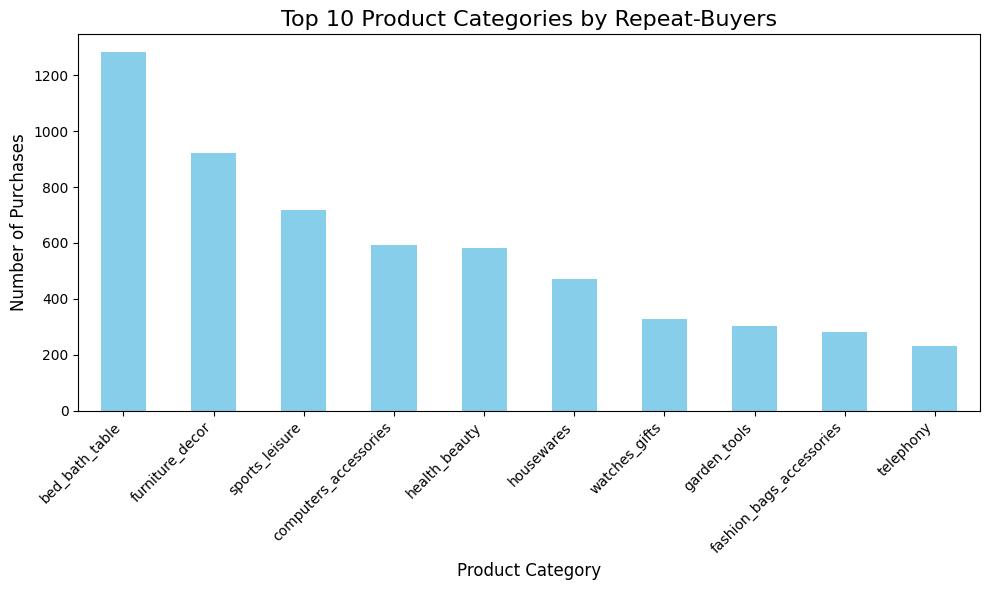

In [8]:
# 1. Get the product_category_name frequency based on repeat buyers
repeat_top_10_categories = repeat_customers['product_category_name'].value_counts().head(10)

#2. Plot the data to graph and show
plt.figure(figsize=(10, 6))
repeat_top_10_categories.plot(kind='bar', color='skyblue')
plt.title('Top 10 Product Categories by Repeat-Buyers', fontsize=16)
plt.xlabel('Product Category', fontsize=12)
plt.ylabel('Number of Purchases', fontsize=12)
plt.xticks(rotation=45, ha='right') 
plt.tight_layout()
plt.show()

Summary Insight :

- The Bed, Bath & Table category leads with the highest number of repeat purchases. This indicates strong customer loyalty and consistent demand for products in this category among repeat buyers.

- Furniture & Decor and Sports & Leisure are also prominent categories for repeat purchases, showing that customers frequently return to purchase products related to home improvement and recreational activities.

Recommendation :

-  Focus on the top-performing categories for repeat buyers to develop strategies that reinforce customer loyalty. Tailoring marketing campaigns and retention efforts for categories with lower purchase frequencies can help boost repeat business and expand customer engagement.


    4.2.3. One-Time Buyers with Multiple Item Based on Similar Category

In [9]:
multi_categories_count = multi_item_customers.groupby('customer_unique_id')['product_category_name'].nunique()

single_categories_ids = multi_categories_count[multi_categories_count == 1].index

multi_categories_ids = multi_categories_count[multi_categories_count > 1].index

single_categories =  multi_item_customers[multi_item_customers['customer_unique_id'].isin(single_categories_ids)]

multi_categories =  multi_item_customers[multi_item_customers['customer_unique_id'].isin(multi_categories_ids)]

single_counts = single_categories['customer_unique_id'].nunique()

multi_counts  = multi_categories['customer_unique_id'].nunique()


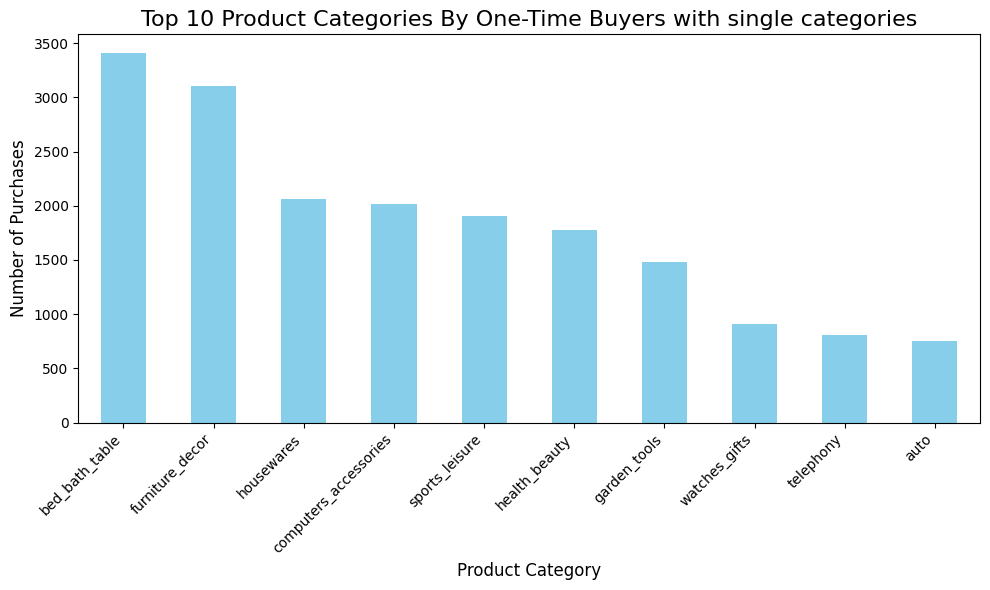

In [10]:
# 1. Get the product_category_name frequency based on one-time buyers
top_10_categories_one = single_categories['product_category_name'].value_counts().head(10)

#2. Plot the data to graph and show
plt.figure(figsize=(10, 6))
top_10_categories_one.plot(kind='bar', color='skyblue')
plt.title('Top 10 Product Categories By One-Time Buyers with single categories', fontsize=16)
plt.xlabel('Product Category', fontsize=12)
plt.ylabel('Number of Purchases', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.tight_layout() 
plt.show()

    4.2.4. One-Time Buyers with Multiple Item Based on Different Category

In [11]:
multi_categories.groupby('customer_unique_id')['product_category_name'].value_counts().reset_index().sort_values(by='count', ascending=False).head(4)

,customer_unique_id,product_category_name,count
1088,db1af3fd6b23ac3873ef02619d548f9c,luggage_accessories,12
1087,db1af3fd6b23ac3873ef02619d548f9c,computers_accessories,12
463,5e33331e26d0a4e1f3fe84b3f9c5549b,bed_bath_table,8
808,a3531b78e25e6948ff198a441c30b8eb,health_beauty,6


,Purchasement Type,Count
0,Single Categories,10502
1,Multiple categories,634


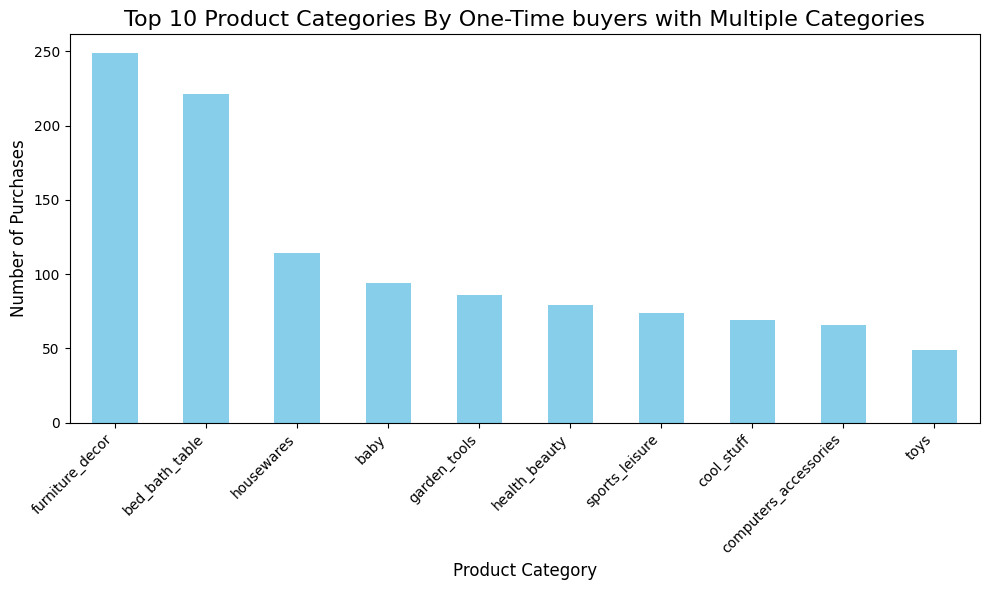

In [12]:
data = {
    'Purchasement Type': ['Single Categories', 'Multiple categories'],
    'Count': [single_counts, multi_counts]
}

single_and_multiple = pd.DataFrame(data)

display(single_and_multiple)

top_10_categories_first = multi_categories['product_category_name'].value_counts().head(10)

plt.figure(figsize=(10, 6))
top_10_categories_first.plot(kind='bar', color='skyblue')
plt.title('Top 10 Product Categories By One-Time buyers with Multiple Categories', fontsize=16)
plt.xlabel('Product Category', fontsize=12)
plt.ylabel('Number of Purchases', fontsize=12)
plt.xticks(rotation=45, ha='right')

plt.tight_layout() 
plt.show()

Summary Insight :

- A total of 10,052 customers who made their first purchase bought more than one quantity but with the same product category.

- A total of 634 customers who made their first purchase bought more than one quantity with different product categories.

- The 5 product categories that are most frequently purchased together in a single transaction are furniture_decor, bed_bath_table, housewares, baby, and garden_tools. It is evident that most buyers have similarities, primarily related to household and home necessities.

- It can be concluded that the majority of buyers who purchase multiple categories are customers who are already established in a household.

##### **4.3. Customer Purchase Frequency Based On Customer City**

This analysis aims to calculate the frequency of purchases made by customers based on their city. The goal is to explore how purchase frequency varies across different cities and to identify any patterns or correlations related to customer behavior, regional preferences, or other influencing factors.

    4.3.1 One-Time Buyers Purchase Frequency Based On Customer City

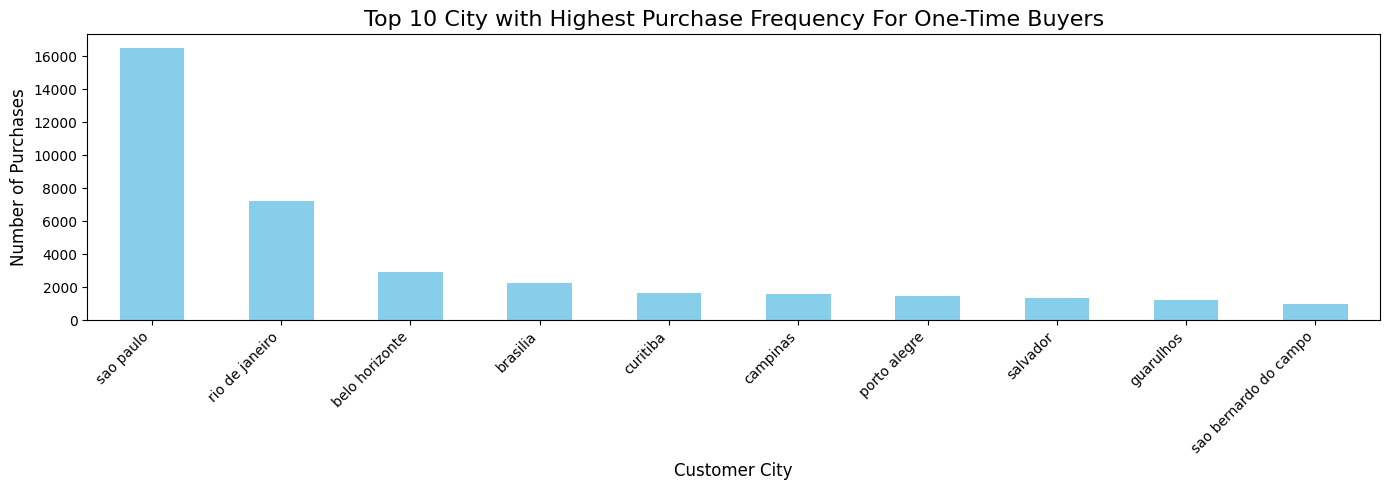

In [13]:
# 1. Get the customer_city based on one-time buyers
first_purchase_by_city = one_customers['customer_city'].value_counts().head(10)

# 2. Plot the data to graph and show
plt.figure(figsize=(14, 5))
first_purchase_by_city.plot(kind='bar', color='skyblue')
plt.title('Top 10 City with Highest Purchase Frequency For One-Time Buyers', fontsize=16)
plt.xlabel('Customer City', fontsize=12)
plt.ylabel('Number of Purchases', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

Summary Insight :

- High Engagement in São Paulo: São Paulo leads by a wide margin, indicating it’s a major market for one-time buyers.

- Significant Presence in Major Cities: Rio de Janeiro and Belo Horizonte also show strong purchase frequencies.

Recommendation :

- Prioritize marketing and promotions in São Paulo to capitalize on its high purchase frequency.

- Targeted campaigns in Rio de Janeiro, Belo Horizonte, and other top cities to boost one-time purchases.

    4.3.2 Repeat-Buyers Purchase Frequency By Customer City

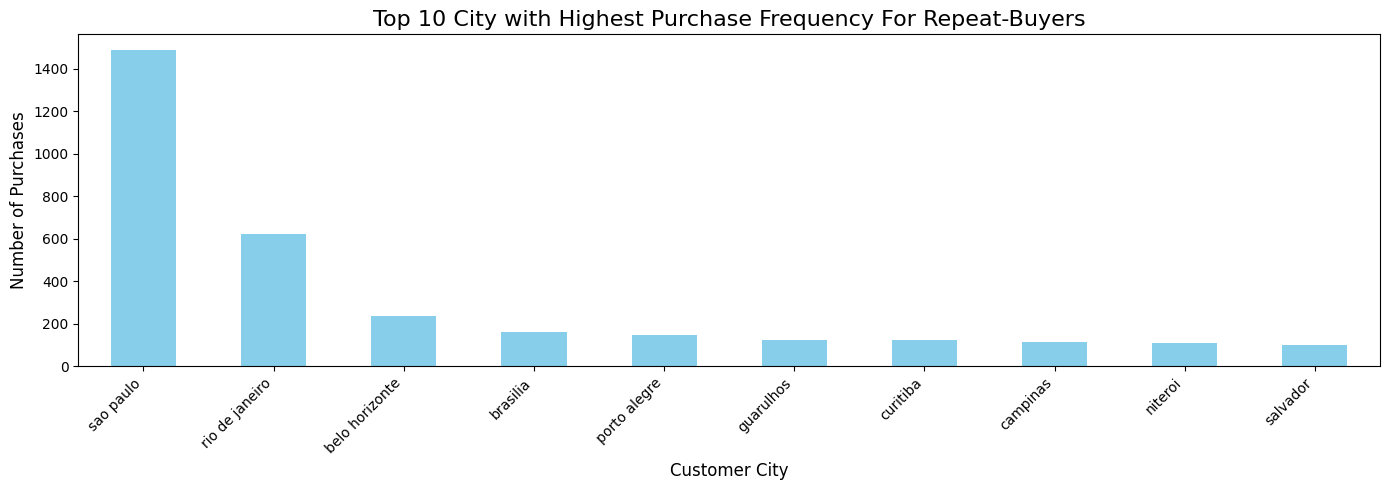

In [14]:
# 1. Get the customer_city based on repeat buyers
repeat_purchase_by_city = repeat_customers['customer_city'].value_counts().head(10) 

# 2. Plot the data to graph and show
plt.figure(figsize=(14, 5))
repeat_purchase_by_city.plot(kind='bar', color='skyblue')
plt.title('Top 10 City with Highest Purchase Frequency For Repeat-Buyers', fontsize=16)
plt.xlabel('Customer City', fontsize=12)
plt.ylabel('Number of Purchases', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

summary Insight :

- São Paulo shows the highest frequency of repeat purchases, indicating strong customer retention in this city.

- Rio de Janeiro and Belo Horizonte also show notable repeat purchase activity.

Recommendation : 

- Enhance Engagement in São Paulo: Strengthen loyalty programs and targeted marketing in São Paulo to further boost repeat purchases.

-  Increase promotional activities and customer retention strategies in Rio de Janeiro and Belo Horizonte to enhance repeat buying.

    4.3.3 Product Frequency Distribution By Seller City

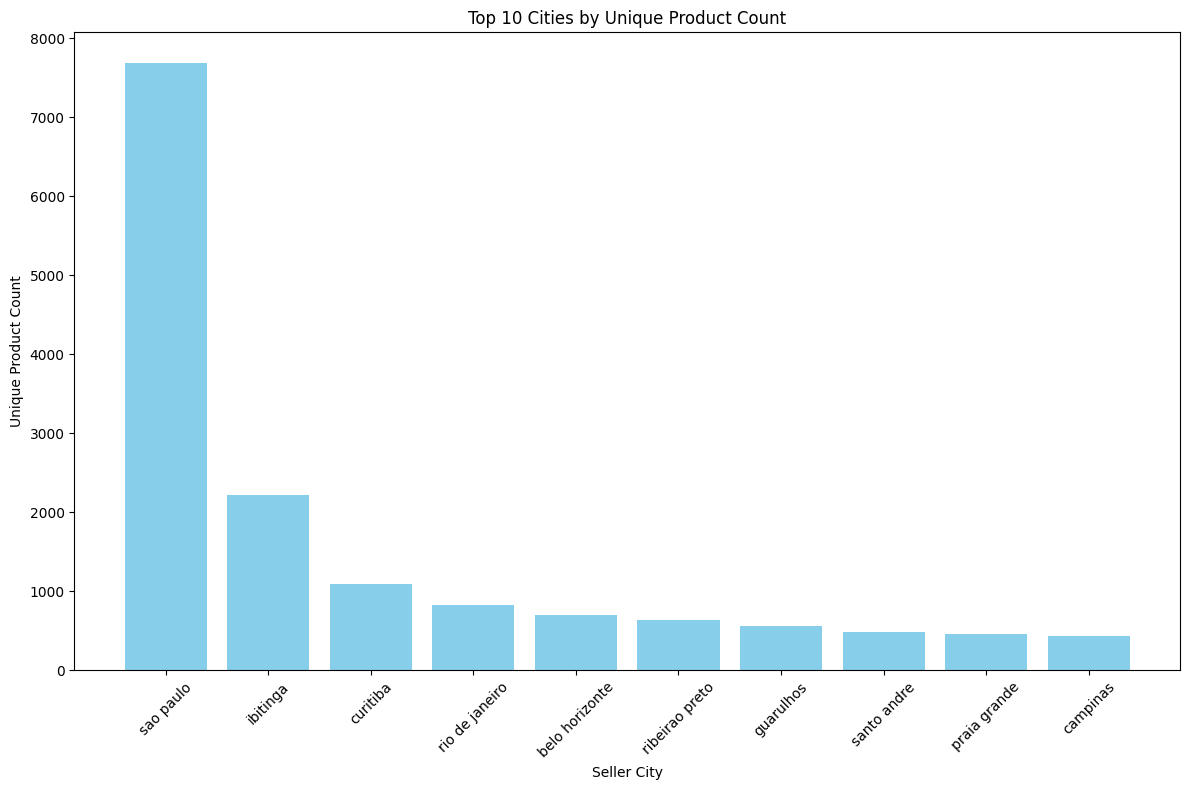

In [15]:
# 1.Group by 'seller_city' and count unique 'product_id' values
city_product_counts = df_olist.groupby('seller_city')['product_id'].nunique().reset_index()

#2. Rename columns for clarity
city_product_counts.columns = ['Seller City', 'Unique Product Count']

#3. Sort by 'Unique Product Count' in descending order
city_product_counts_sorted = city_product_counts.sort_values(by='Unique Product Count', ascending=False)

# 4. Get the top 10 cities
top_10_cities = city_product_counts_sorted.head(10)

# 5. Plot the top 10 cities with unique product counts
plt.figure(figsize=(12, 8))
plt.bar(top_10_cities['Seller City'], top_10_cities['Unique Product Count'], color='skyblue')
plt.xlabel('Seller City')
plt.ylabel('Unique Product Count')
plt.title('Top 10 Cities by Unique Product Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Summary Insight :

- Products that originate from São Paulo are the most frequently sold on the e-commerce platform. This is related to the high frequency of purchases of items from that city.

- Meanwhile, Ibitinga and Curitiba rank second and third in terms of products that originate from these cities but are not sold as frequently. These two cities are not among the top cities with the highest purchase frequency. Further analysis may be needed to understand the reasons behind this, based on average purchase values and customer satisfaction scores for products from these cities.

Recommendation : 

- Encourage expansion and diversification in cities like Ibitinga and Curitiba to balance the product distribution.

##### **4.4. Customer Purchase Frequency Based On Customer State**

This analysis aims to calculate the frequency of purchases made by customers based on their state. The goal is to understand how purchase frequency varies across different states and to determine if there are any patterns or correlations related to customer behavior or other influencing factors.

    4.4.1 One-Time Buyers Purchase Frequency Based On Customer State 

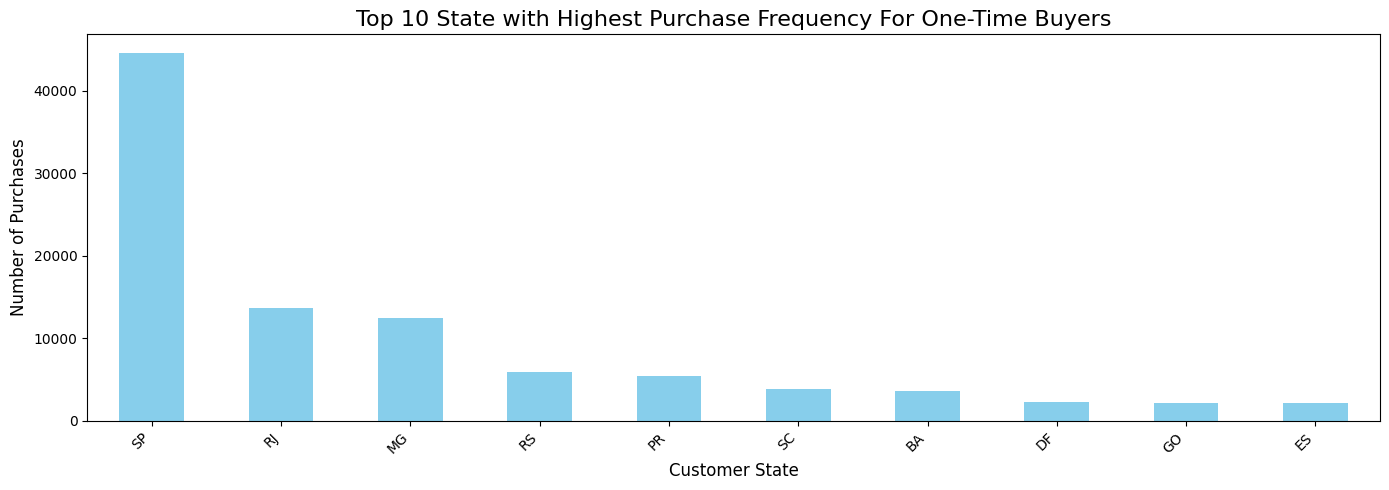

In [16]:
first_purchase_by_state = one_customers['customer_state'].value_counts().head(10)

plt.figure(figsize=(14, 5))
first_purchase_by_state.plot(kind='bar', color='skyblue')
plt.title('Top 10 State with Highest Purchase Frequency For One-Time Buyers', fontsize=16)
plt.xlabel('Customer State', fontsize=12)
plt.ylabel('Number of Purchases', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

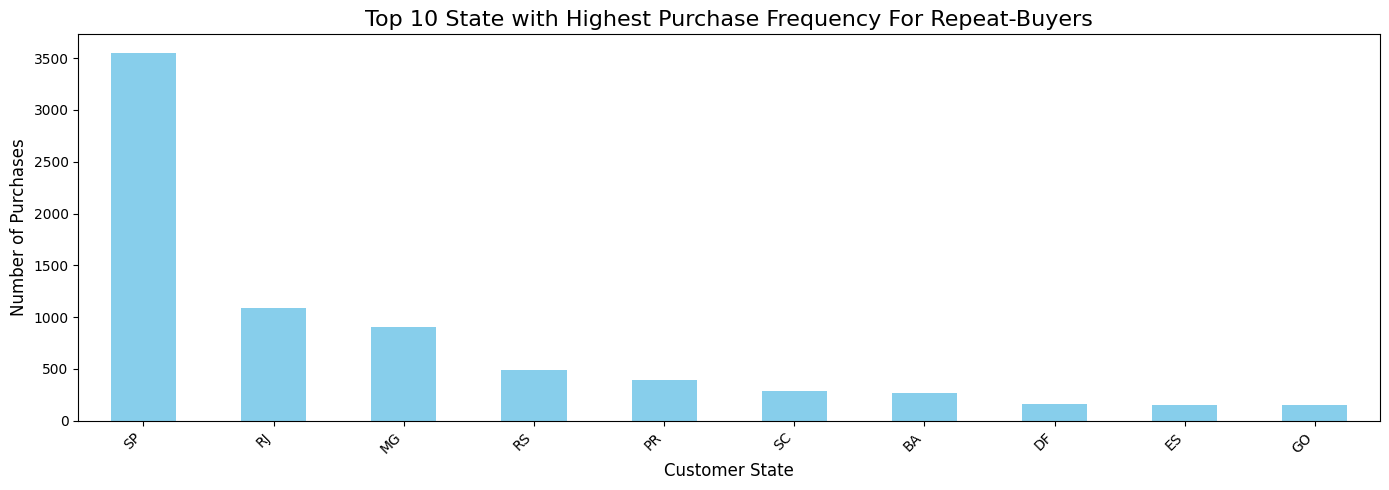

In [17]:
repeat_purchase_by_state = repeat_customers['customer_state'].value_counts().head(10)

plt.figure(figsize=(14, 5))
repeat_purchase_by_state.plot(kind='bar', color='skyblue')
plt.title('Top 10 State with Highest Purchase Frequency For Repeat-Buyers', fontsize=16)
plt.xlabel('Customer State', fontsize=12)
plt.ylabel('Number of Purchases', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

summary insight between 4.4.1 and 4.4.2 :

- State where the Most Purchase Frequency by customers distributed is from sao paolo even for first time buyers or repeat buyers. both has the similiar purchase frequency distribution

#### **4.5. Customer Distribution Based On City**



This analysis aims to calculate the distribution of customers based on their state. The goal is to examine how this distribution relates to the frequency of purchases and whether it is influenced by any specific factors.

    4.5.1. One-Time Buyers Customer Distribution Based On City

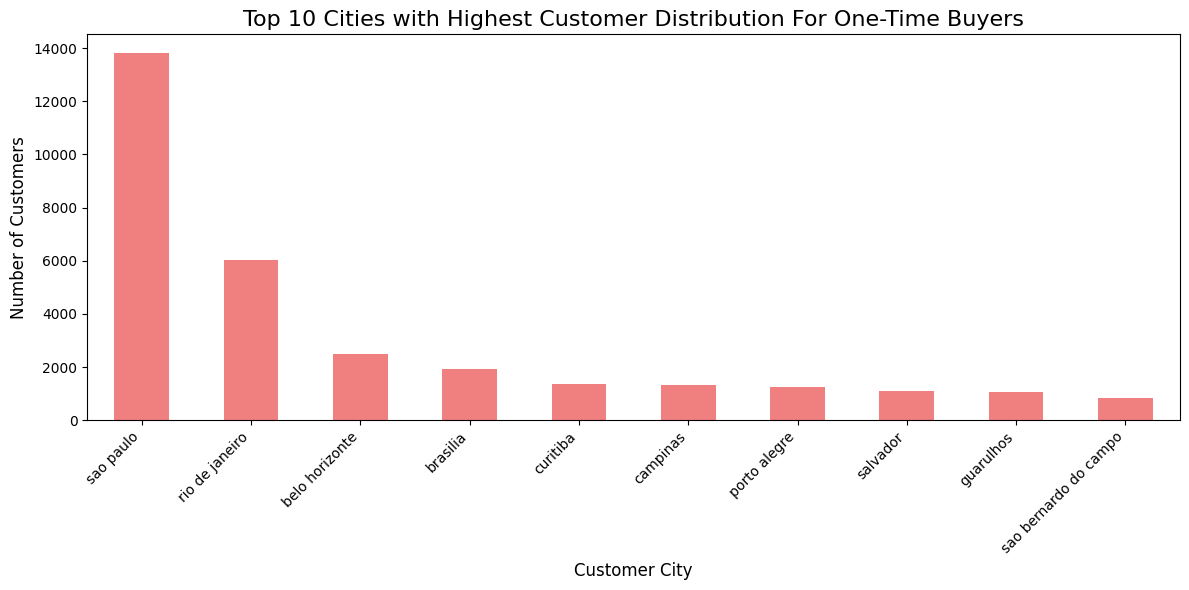

In [18]:
city_customer_counts = one_customers.groupby('customer_city')['customer_unique_id'].nunique()

top_10_city_customer_counts = city_customer_counts.sort_values(ascending=False).head(10)

plt.figure(figsize=(12, 6))
top_10_city_customer_counts.plot(kind='bar', color='lightcoral')
plt.title('Top 10 Cities with Highest Customer Distribution For One-Time Buyers', fontsize=16)
plt.xlabel('Customer City', fontsize=12)
plt.ylabel('Number of Customers', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


Summary Insight :

- São Paulo leads significantly in one-time buyers, indicating a strong market presence.

- High Engagement in Major Cities: Other major cities like Rio de Janeiro and Belo Horizonte also show notable customer counts.

Recommendation : 

- Focus Marketing in São Paulo Given its high number of one-time buyers, prioritize marketing strategies and promotional activities in São Paulo.

    4.5.2. Repeat Buyers Customer Distribution based on city

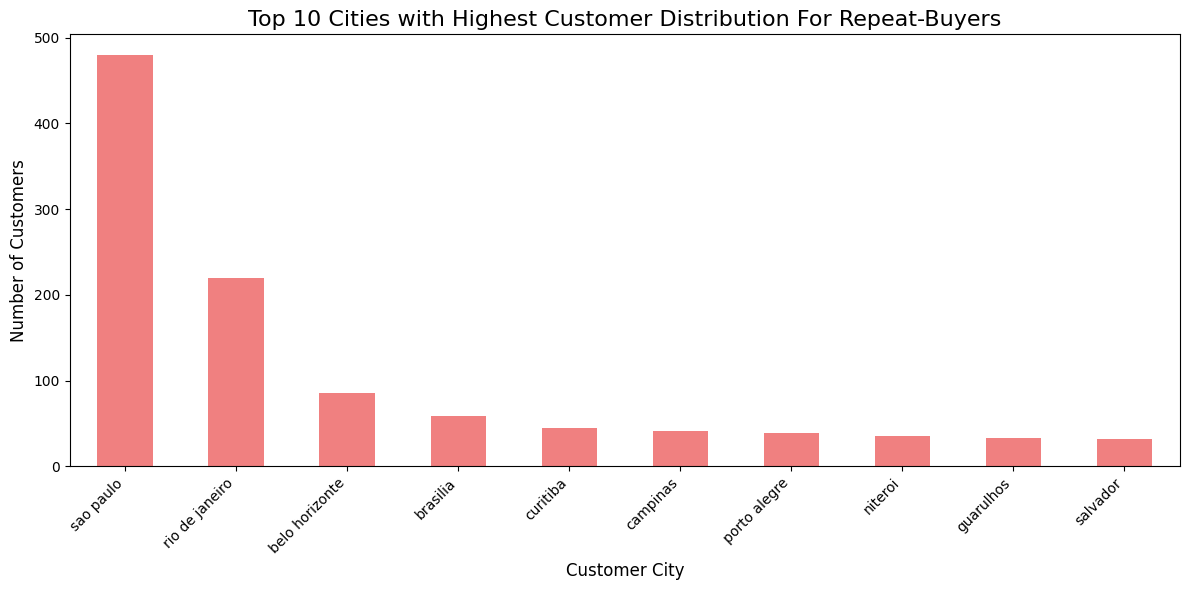

In [19]:
city_customer_counts = repeat_customers.groupby('customer_city')['customer_unique_id'].nunique()

top_10_city_customer_counts = city_customer_counts.sort_values(ascending=False).head(10)

plt.figure(figsize=(12, 6))
top_10_city_customer_counts.plot(kind='bar', color='lightcoral')

# Menambahkan judul dan label
plt.title('Top 10 Cities with Highest Customer Distribution For Repeat-Buyers', fontsize=16)
plt.xlabel('Customer City', fontsize=12)
plt.ylabel('Number of Customers', fontsize=12)

# Memutar label kota di sumbu x agar lebih terbaca
plt.xticks(rotation=45, ha='right')

# Menampilkan grafik
plt.tight_layout()
plt.show()


Summary Insight between 4.5.1, 4.5.2, 4.3.1 and 4.3.2
- The majority of buyers, both first-time and repeat buyers, are from São Paulo, followed by Rio de Janeiro.

- The distribution of buyers shows a linear relationship with the frequency of purchases, which is also dominated by São Paulo.

##### **4.6. Customer Purchase Review Score**

This analysis aims to evaluate the average review scores given by customers based on their purchase activities. The goal is to understand how review scores vary across different products, categories, or customer segments and identify any patterns or trends in customer satisfaction.

    4.6.1. One-Time Buyers Purchase Review Score

,review_score,count,Percent
0,5.0,60901,57.430476
1,4.0,20646,19.469461
2,1.0,12049,11.362372
3,3.0,8887,8.380563
4,2.0,3560,3.357129


C:\Users\user\AppData\Local\Temp\ipykernel_6732\3557740042.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x='review_score', y='count', data=review_counts, palette='viridis')


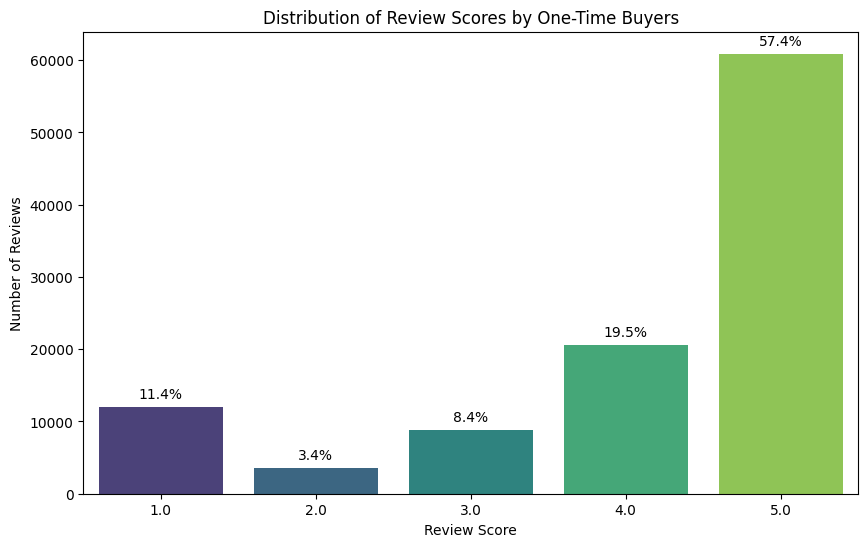

In [20]:
review_counts = one_customers['review_score'].value_counts().reset_index()

total_reviews = review_counts['count'].sum()

review_counts['Percent'] = (review_counts['count'] / total_reviews) * 100

display(review_counts)

plt.figure(figsize=(10, 6))
ax = sns.barplot(x='review_score', y='count', data=review_counts, palette='viridis')
for p in ax.patches:
    height = p.get_height()
    percentage = (height / total_reviews) * 100
    ax.annotate(f'{percentage:.1f}%', 
                (p.get_x() + p.get_width() / 2., height), 
                ha='center', va='center',
                xytext=(0, 9), 
                textcoords='offset points')

plt.title('Distribution of Review Scores by One-Time Buyers')
plt.xlabel('Review Score')
plt.ylabel('Number of Reviews')
plt.show()



    4.6.2. Repeat-Buyers Purchase Review Score

,review_score,count,Percent
0,5.0,4890,60.805770
1,4.0,1379,17.147476
2,1.0,832,10.345685
3,3.0,659,8.194479
4,2.0,282,3.506590


C:\Users\user\AppData\Local\Temp\ipykernel_6732\2392947445.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x='review_score', y='count', data=review_counts, palette='viridis')


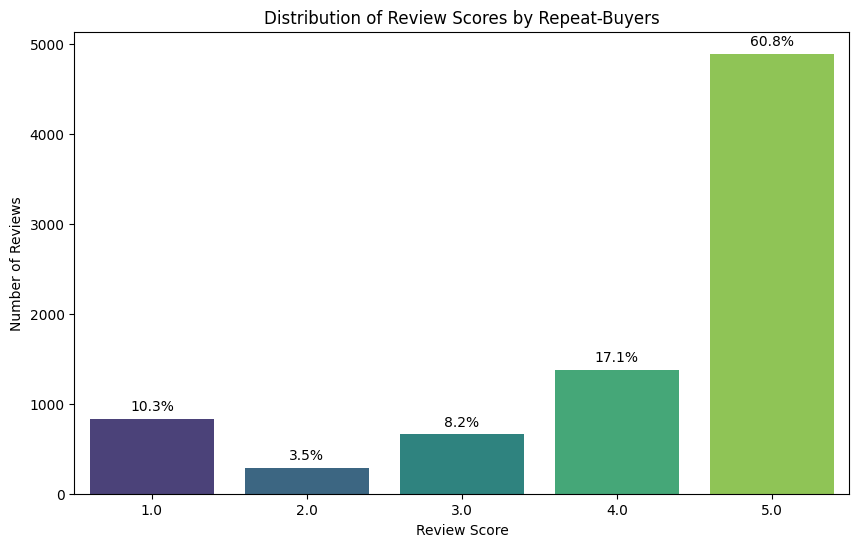

In [21]:
review_counts = repeat_customers['review_score'].value_counts().reset_index()

total_reviews = review_counts['count'].sum()

review_counts['Percent'] = (review_counts['count'] / total_reviews) * 100

display(review_counts)

plt.figure(figsize=(10, 6))
ax = sns.barplot(x='review_score', y='count', data=review_counts, palette='viridis')
for p in ax.patches:
    height = p.get_height()
    percentage = (height / total_reviews) * 100
    ax.annotate(f'{percentage:.1f}%', 
                (p.get_x() + p.get_width() / 2., height), 
                ha='center', va='center',
                xytext=(0, 9), 
                textcoords='offset points')

plt.title('Distribution of Review Scores by Repeat-Buyers')
plt.xlabel('Review Score')
plt.ylabel('Number of Reviews')
plt.show()

Summary insight between 4.6.1 & 4.6.2 :
- Repeat buyers tend to give slightly higher review scores compared to first-time buyers, indicating a higher level of satisfaction with their repeat purchases.

- The distribution of review scores is relatively similar between first-time and repeat buyers, with a notable emphasis on high scores (5), suggesting overall positive customer experiences.

- he trend suggests that customers who make repeat purchases are slightly more satisfied, which could be indicative of improved customer satisfaction over time or a higher likelihood of returning for more positive experiences.

Recommendation :

- Focus on the issues highlighted by lower scores (1.0 and 2.0) to improve product or service quality and address customer concerns.

- Regularly review customer feedback to quickly identify and address any emerging issues or declining satisfaction trends. like a shopping experience


    4.6.3. Product Category Based on Review Score

The purpose of this analysis is to identify the product categories that are most frequently associated with negative customer experiences, as reflected by review scores of 1 and 2. By determining which categories receive the most negative reviews, businesses can focus on improving product quality, customer service, or other factors contributing to customer dissatisfaction. This analysis aims to help prioritize product categories that require attention to enhance overall customer satisfaction and reduce negative feedback

,Score 1,Score 2
product_category_name,,
bed_bath_table,1633.0,548.0
computers_accessories,1067.0,273.0
furniture_decor,1175.0,371.0
health_beauty,995.0,235.0
housewares,0.0,254.0
sports_leisure,906.0,0.0


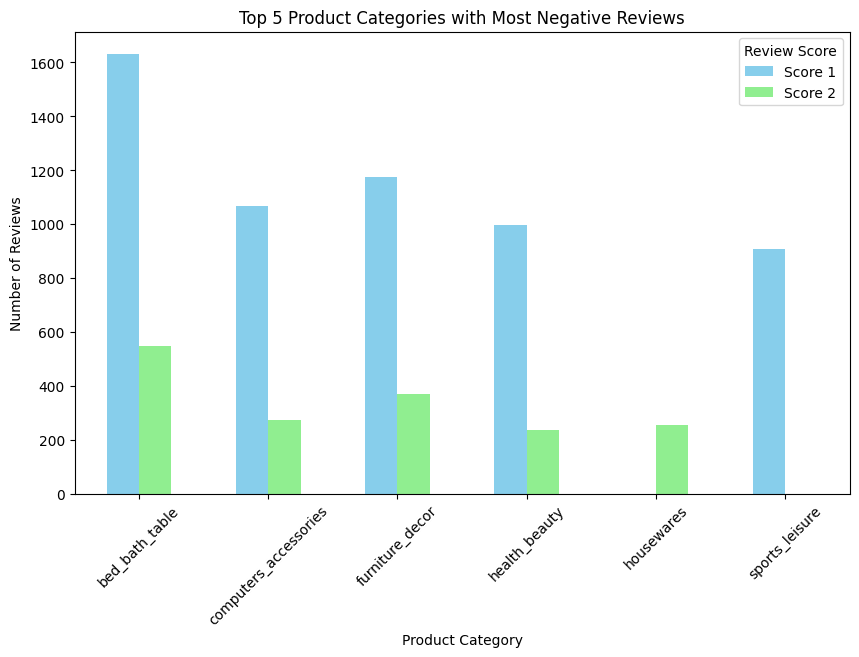

In [22]:
df_score_1 = df_olist[df_olist['review_score'] == 1]
df_score_2 = df_olist[df_olist['review_score'] == 2]

category_counts_1 = df_score_1['product_category_name'].value_counts().head(5)
category_counts_2 = df_score_2['product_category_name'].value_counts().head(5)

category_counts = pd.DataFrame({
    'Score 1': category_counts_1,
    'Score 2': category_counts_2
}).fillna(0)


display(category_counts)

category_counts.plot(kind='bar', figsize=(10, 6), color=['skyblue', 'lightgreen'])
plt.title('Top 5 Product Categories with Most Negative Reviews')
plt.xlabel('Product Category')
plt.ylabel('Number of Reviews')
plt.xticks(rotation=45)
plt.legend(title='Review Score')
plt.show()


Summary Insight :

- Bed Bath Table received the highest number of negative reviews with 1,633 reviews at score 1 and 548 reviews at score 2.

- Furniture Decor and Computers Accessories also had significant negative feedback, with 1,175 and 1,067 reviews at score 1, respectively.

- Housewares and Sports Leisure show extreme cases where negative reviews were concentrated in only one score category, with 254 reviews at score 2 for Housewares and 906 reviews at score 1 for Sports Leisure.

Recommendation :

- Focus on addressing the issues in "Bed & Bath Table," "Computers & Accessories," and "Furniture & Decor" to reduce dissatisfaction.

- Gather detailed feedback from customers who gave low scores to understand the specific problems and areas for improvement.

- Strengthen quality control and customer service for these categories to prevent negative experiences and improve overall satisfaction.

##### **4.7. Distribution of Customer Prefered Payment Type**

This analysis aims to determine the distribution of preferred payment types among customers. The goal is to understand which payment methods are most commonly used by customers and to identify any prevalent trends or preferences. By analyzing the distribution, businesses can gain insights into payment behavior, potentially influencing payment processing strategies and customer experience enhancements.

    4.7.1. First-buyers Payment-Type Distribution

payment_type
credit_card    78383
boleto         20662
voucher         5456
debit_card      1542
Name: count, dtype: int64

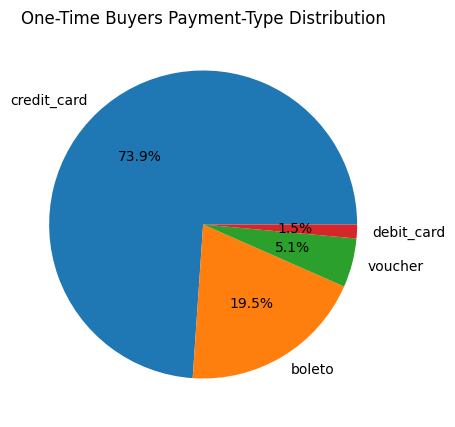

In [23]:
payment_type_counts = one_customers['payment_type'].value_counts()
display(payment_type_counts)

plt.figure(figsize=(8, 5))
plt.pie(payment_type_counts, labels=payment_type_counts.index, autopct='%1.1f%%', colors=plt.get_cmap('tab10').colors)
plt.title('One-Time Buyers Payment-Type Distribution')
plt.show()


What is Boleto?

Boleto Bancário, simply referred to as Boleto (English: Ticket) is a payment method in Brazil regulated by FEBRABAN, short for Brazilian Federation of Banks.

A boleto can be paid at ATMs, branch facilities and internet banking of any Bank, Post Office, Lottery Agent and some supermarkets until its due date. After the due date it can only be paid at the issuer bank facilities.

Boleto can only be collected by an authorized Collector Agent in the Brazilian territory.[citation needed] All Brazilian banks, Post Offices (Correios) and Lottery Agencies plus some companies from the private sector have joined the system.[1]

source: https://en.wikipedia.org/wiki/Boleto

    4.7.2. Repeat-Buyers Payment-Type Distribution

payment_type
credit_card    5797
boleto         1541
voucher         612
debit_card       92
Name: count, dtype: int64

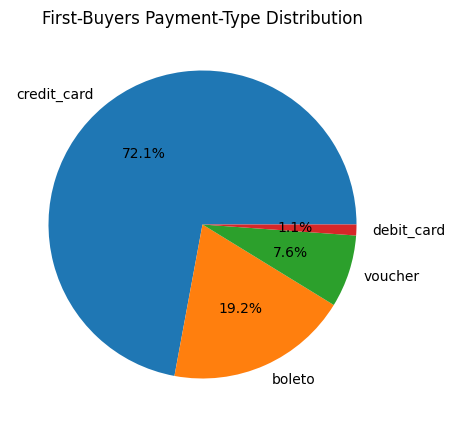

In [24]:
payment_type_counts = repeat_customers['payment_type'].value_counts()
display(payment_type_counts)

plt.figure(figsize=(8, 5))
plt.pie(payment_type_counts, labels=payment_type_counts.index, autopct='%1.1f%%', colors=plt.get_cmap('tab10').colors)
plt.title('First-Buyers Payment-Type Distribution')
plt.show()


Summary insight between 4.7.1 & 4.7.2 :

- For first-time buyers, the credit card is the most popular payment method, accounting for the majority of transactions. Boleto and vouchers follow, while debit cards are used less frequently.

- Among repeat buyers, credit cards remain the most preferred payment method, with a significant proportion compared to other payment types. Boleto is still a common choice but shows a decrease in proportion compared to first-time buyers. Vouchers and debit cards have lower usage rates among repeat buyers.

##### **4.8. Distribution of Customer Prefered Payment-Installment**

    4.8.1. One-Time Buyers Payment-Installment Distribution

,payment_installments,count
0,1.0,52983
1,2.0,12484
2,3.0,10651
3,4.0,7238
4,10.0,6009


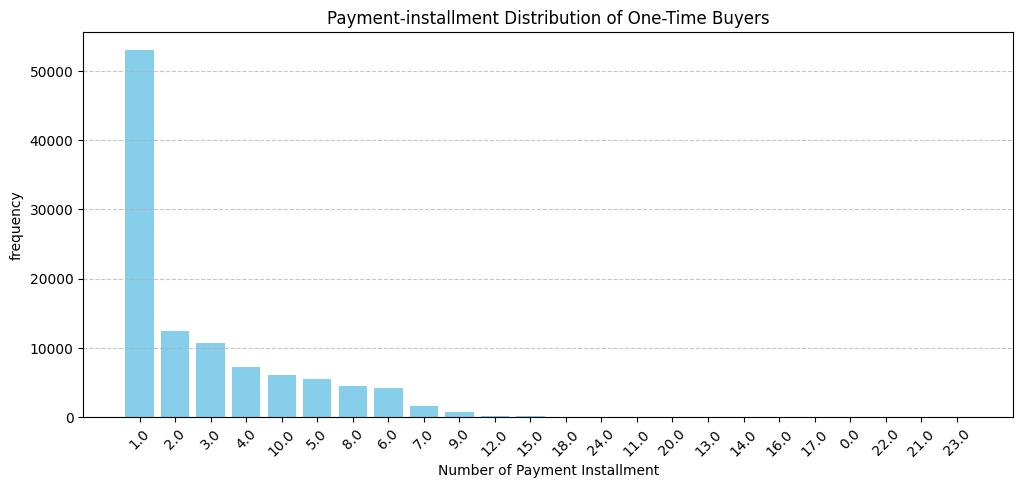

In [25]:
payment_installments_counts = one_customers['payment_installments'].value_counts().reset_index()
payment_installments_counts.columns = ['payment_installments', 'count']  
payment_installments_counts = payment_installments_counts.sort_values(by='count', ascending=False)


display(payment_installments_counts.head(5))

plt.figure(figsize=(12, 5))
plt.bar(payment_installments_counts['payment_installments'].astype(str), payment_installments_counts['count'], color='skyblue')
plt.xlabel('Number of Payment Installment')
plt.ylabel('frequency')
plt.title('Payment-installment Distribution of One-Time Buyers')
plt.xticks(rotation=45) 
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


    4.8.2. Repeat-Buyers Payment-Installment Distribution

,payment_installments,count
0,1.0,3843
1,2.0,757
2,3.0,753
3,10.0,697
4,4.0,519


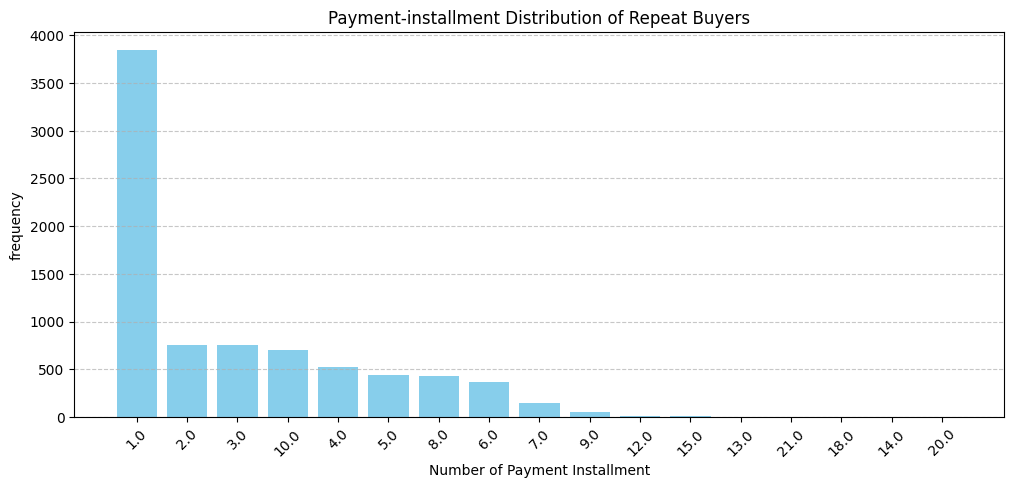

In [26]:
payment_installments_counts = repeat_customers['payment_installments'].value_counts().reset_index()
payment_installments_counts.columns = ['payment_installments', 'count']  # Ganti nama kolom untuk kemudahan

payment_installments_counts = payment_installments_counts.sort_values(by='count', ascending=False)

display(payment_installments_counts.head(5))

plt.figure(figsize=(12, 5))
plt.bar(payment_installments_counts['payment_installments'].astype(str), payment_installments_counts['count'], color='skyblue')
plt.xlabel('Number of Payment Installment')
plt.ylabel('frequency')
plt.title('Payment-installment Distribution of Repeat Buyers')
plt.xticks(rotation=45) 
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


Summary Insight between 4.8.1 & 4.8.2
- Preference Trends: Both first-time and repeat buyers predominantly prefer single payments. However, the inclination towards longer installment plans increases among repeat buyers, possibly reflecting a shift towards more flexible payment options with continued patronage.

- Payment Flexibility: The data indicates that while single payments are most popular, a notable portion of both buyer groups opt for extended payment plans. This suggests that providing a variety of installment options could cater to different customer preferences and enhance satisfaction.

##### **4.9. Customer Purchase Frequency By Time**

This analysis aims to examine the frequency of customer purchases based on different time periods. The goal is to understand purchasing behavior over various time frames, such as by day of the week, month, or year. By analyzing these patterns, we can identify trends and peak times for purchases, which can help in optimizing marketing strategies, managing inventory, and improving overall customer experience. The insights derived from this analysis will assist in recognizing any temporal patterns in customer buying habits, which can inform business decisions and strategic planning.

    4.9.1. Yearly Purchase Frequency

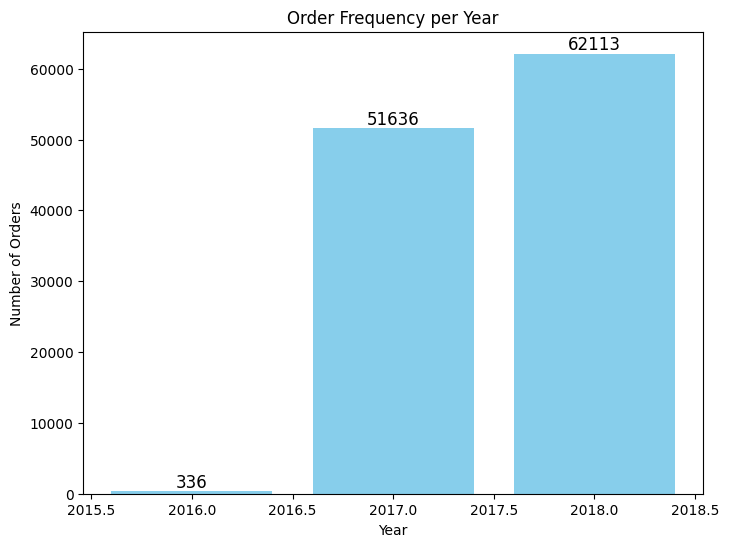

In [27]:
yearly_purchase = df_olist.copy()

yearly_purchase['order_year'] = pd.to_datetime(yearly_purchase['order_purchase_timestamp']).dt.year

order_frequency_per_year = yearly_purchase['order_year'].value_counts().sort_index()

# Plot bar graph
plt.figure(figsize=(8, 6))
bars = plt.bar(order_frequency_per_year.index, order_frequency_per_year.values, color='skyblue')
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2.0, height, int(height), ha='center', va='bottom', fontsize=12)

plt.title('Order Frequency per Year')
plt.xlabel('Year')
plt.ylabel('Number of Orders')
plt.xticks(rotation=0)
plt.show()

Summary Insight :

- The data indicates a dramatic increase in purchase frequency from 2016 to 2018. The substantial growth from 2016 to 2017, and continued increase into 2018, suggests a strong upward trend in customer engagement or market expansion during these years.

    4.9.1. Montly Purchase Frequency From 2016 - 2018

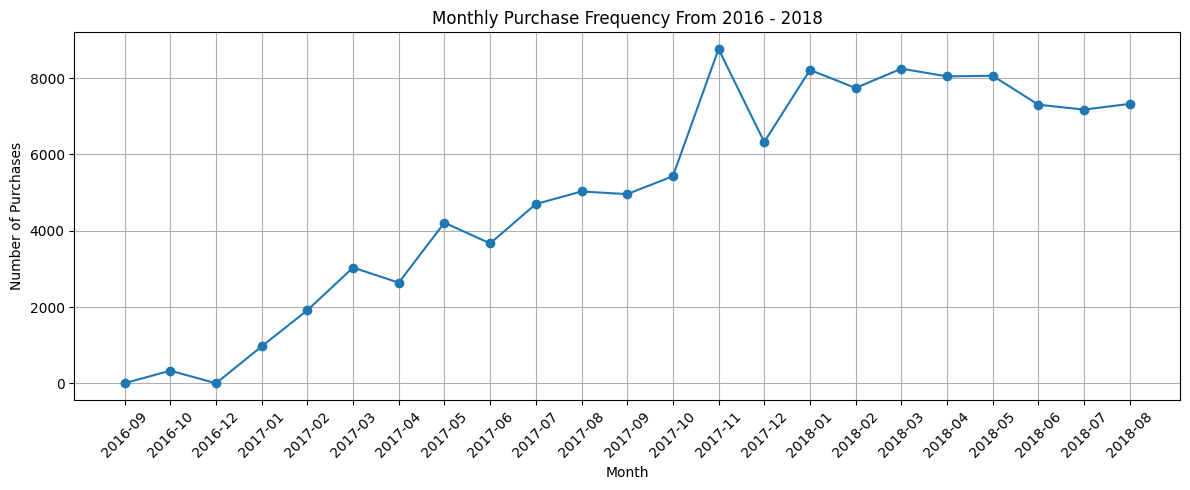

In [28]:
monthly_purchase = df_olist.copy()

monthly_purchase['order_purchase_timestamp'] = pd.to_datetime(monthly_purchase['order_purchase_timestamp'])

monthly_purchase['purchase_month'] = monthly_purchase['order_purchase_timestamp'].dt.to_period('M')

monthly_orders = monthly_purchase.groupby('purchase_month').size().reset_index(name='order_count')

plt.figure(figsize=(12, 5))
plt.plot(monthly_orders['purchase_month'].astype(str), monthly_orders['order_count'], marker='o', linestyle='-')
plt.title('Monthly Purchase Frequency From 2016 - 2018')
plt.xlabel('Month')
plt.ylabel('Number of Purchases')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()


Summary Insight :

- Rapid Initial Growth: The data shows a strong increase in purchase frequency over 2017, indicating effective growth strategies or seasonal demand spikes.

- High Order volumes remained elevated in 2018, reflecting ongoing customer interest.

- Despite high order volumes, customer retention is critically low, with only 3% of customers making repeat purchases over two years. This suggests that while initial sales are strong, retaining customers for future transactions remains a significant challenge.


    4.9.2 Annual Purchace Frequency From 2016 - 2018

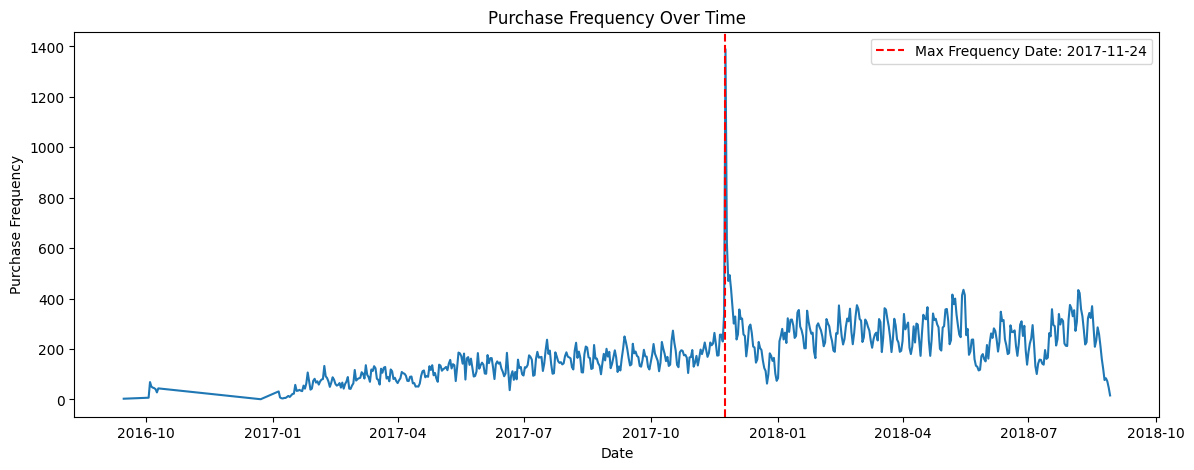

In [29]:
annual_purchase = df_olist.copy()
annual_purchase['order_purchase_timestamp'] = pd.to_datetime(annual_purchase['order_purchase_timestamp'])
annual_purchase['order_purchase_timestamp'] = annual_purchase['order_purchase_timestamp'].dt.date

annual_frequency = annual_purchase.groupby('order_purchase_timestamp').size()

max_date = annual_frequency.idxmax()
max_frequency = annual_frequency.max()

plt.figure(figsize=(14,5))
annual_frequency.plot()
plt.axvline(x=max_date, color='red', linestyle='--', label=f'Max Frequency Date: {max_date}')

plt.title('Purchase Frequency Over Time')
plt.xlabel('Date')
plt.ylabel('Purchase Frequency')
plt.legend()
plt.show()


Summary Insight :

- The total number of customers transacting on Olist from 2016 to 2018 generally increased each year. There was a significant spike on November 24, 2017, due to 'Black Friday,' a major shopping tradition that typically falls on the first Friday after Thanksgiving in the United States. Thanksgiving usually occurs on the fourth Thursday of November, when families and friends gather to give thanks and celebrate the blessings and harvest of the year.

- Several reasons contribute to the high number of purchases on Black Friday, including large discounts, online promotions, and preparation for Christmas.

- In 2016, Brazil's economic conditions experienced contraction. The country faced several challenges, including economic recession and high inflation, which could negatively impact consumer purchasing power. High unemployment or economic uncertainty might affect buying power as people worry about their jobs and income.

- The period with the fewest customer transactions was December 23, 2016.

    4.9.3 Average Purchase Frequency by Days

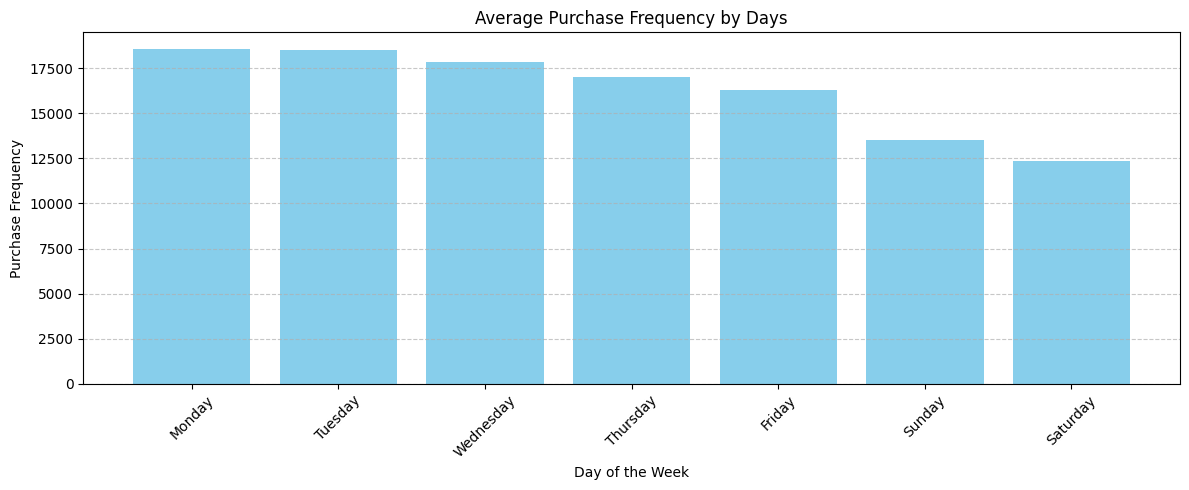

In [30]:
average_weekday_purchase = df_olist.copy()

average_weekday_purchase['order_purchase_timestamp'] = pd.to_datetime(average_weekday_purchase['order_purchase_timestamp'])

average_weekday_purchase['order_purchase_day'] = average_weekday_purchase['order_purchase_timestamp'].dt.day_name()

weekday_frequency = average_weekday_purchase.groupby('order_purchase_day').size().reset_index(name='order_count')

weekday_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
weekday_frequency['order_purchase_day'] = pd.Categorical(weekday_frequency['order_purchase_day'], categories=weekday_order, ordered=True)

weekday_frequency = weekday_frequency.sort_values(by='order_count', ascending=False)

plt.figure(figsize=(12, 5))
plt.bar(weekday_frequency['order_purchase_day'], weekday_frequency['order_count'], color='skyblue')
plt.title('Average Purchase Frequency by Days')
plt.xlabel('Day of the Week')
plt.ylabel('Purchase Frequency')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


Summary Insight :

1. Weekday vs. Weekend:

    - Weekdays: The number of purchases is significantly higher on weekdays compared to weekends.

    - Weekends: There is a noticeable drop in order counts on weekends, with Sunday and Saturday having the lowest number of purchases.

2. Most Active Days:

    - Monday : Monday has the highest number of orders with 15,340 purchases. This could be due to customers making purchases after the weekend, possibly driven by promotions or reminders from the weekend.

    - Tuesday and Wednesday: These days also see high activity with 15,164 and 14,711 orders respectively, indicating strong mid-week engagement.

3. Least Active Days:

    - Saturday: Saturday has the lowest number of orders with 10,304 purchases. This suggests that customers are less likely to shop online during the start of the weekend.

    - Sunday: Sunday has slightly more activity than Saturday but still ranks low with 11,403 orders.


Recommendation :

- Commany Could Offer limited-time deals or bundles that encourage customers to purchase over the weekend.

    4.9.4 Average Purchase Frequency by Hours


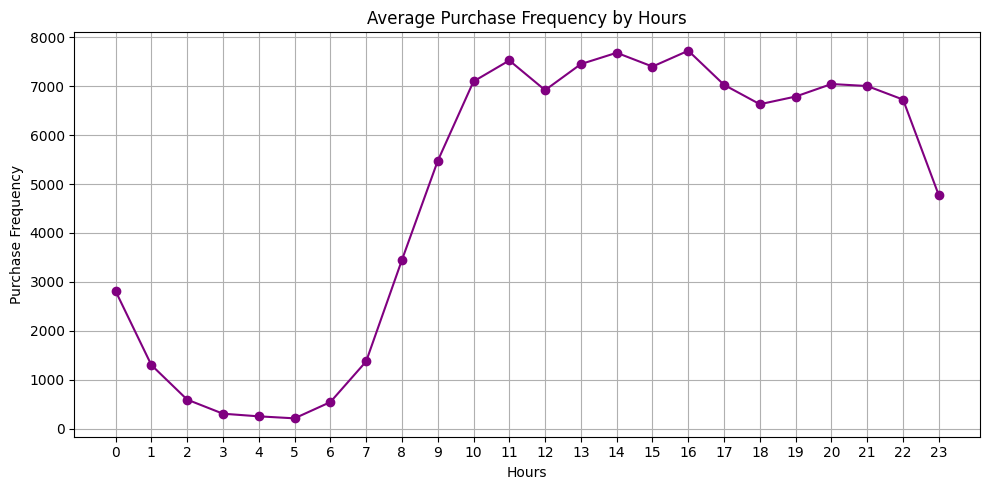

In [31]:
average_hour_purchase = df_olist.copy()

average_hour_purchase['order_purchase_timestamp'] = pd.to_datetime(average_hour_purchase['order_purchase_timestamp'])

average_hour_purchase['purchase_hour'] = average_hour_purchase['order_purchase_timestamp'].dt.hour

hourly_frequency = average_hour_purchase.groupby('purchase_hour').size().reset_index(name='order_count')

plt.figure(figsize=(10, 5))
plt.plot(hourly_frequency['purchase_hour'], hourly_frequency['order_count'], marker='o', linestyle='-', color='purple')
plt.title('Average Purchase Frequency by Hours')
plt.xlabel('Hours')
plt.ylabel('Purchase Frequency')
plt.xticks(range(0, 24))
plt.grid(True)
plt.tight_layout()
plt.show()

Summary Insight :
1. Hours with the Highest Number of Orders:

    - 4 PM (16:00 - 16:59) has the highest number of orders with 7,723 orders. This indicates that customers tend to make purchases in the late afternoon.

    - 2 PM (14:00 - 14:59) also shows high order volume with 7,678 orders, suggesting increased shopping activity in the late afternoon, approaching the end of the workday.

2. Hours with the Lowest Number of Orders:

    - 4 AM (04:00 - 04:59) has the lowest number of orders with 250 orders. This indicates that online shopping is relatively low during the early morning hours.

    4.9.5 Distribution of Repeat-Buyers Purchase Periods 


In [32]:
customer_repeat_purchase = repeat_customers.copy()

customer_repeat_purchase ['order_purchase_timestamp'] = pd.to_datetime(customer_repeat_purchase ['order_purchase_timestamp'])

customer_repeat_purchase = customer_repeat_purchase.sort_values(by=['customer_unique_id', 'order_purchase_timestamp'])

customer_repeat_purchase['previous_purchase'] = customer_repeat_purchase.groupby('customer_unique_id')['order_purchase_timestamp'].shift(1)

customer_repeat_purchase['time_difference'] = (customer_repeat_purchase['order_purchase_timestamp'] - customer_repeat_purchase['previous_purchase']).dt.days

customer_repeat_purchase = customer_repeat_purchase.dropna(subset=['time_difference'])

customer_repeat_purchase[['customer_unique_id', 'order_purchase_timestamp', 'previous_purchase', 'time_difference']].sort_values(by='time_difference', ascending=False).head(5)

,customer_unique_id,order_purchase_timestamp,previous_purchase,time_difference
2313,ccafc1c3f270410521c3c6f3b249870f,2018-06-07 19:03:12,2016-10-06 19:33:34,608.0
85044,d8f3c4f441a9b59a29f977df16724f38,2018-08-24 17:52:59,2017-01-18 21:08:18,582.0
88385,94e5ea5a8c1bf546db2739673060c43f,2018-05-09 13:49:19,2016-10-05 21:10:56,580.0
65894,87b3f231705783eb2217e25851c0a45d,2018-05-04 11:14:37,2016-10-08 18:45:34,572.0
22749,4e23e1826902ec9f208e8cc61329b494,2018-03-13 22:28:21,2016-10-05 12:32:55,524.0


In [33]:
def categorize_time_difference(days):
    if days <= 7:
        return '1 Week'  
    elif days <= 14:
        return '2 Weeks'  
    elif days <= 30:
        return '1 Month' 
    elif days <= 60:
        return '2 Months' 
    elif days <= 90:
        return '3 Months' 
    else:
        return 'More than 3 Months' 

customer_repeat_purchase['time_category'] = customer_repeat_purchase['time_difference'].apply(categorize_time_difference)

time_distribution = customer_repeat_purchase['time_category'].value_counts().reset_index()

time_distribution.columns = ['time_category', 'count']


C:\Users\user\AppData\Local\Temp\ipykernel_6732\1174290865.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='time_category', y='count', data=time_distribution, palette='viridis')


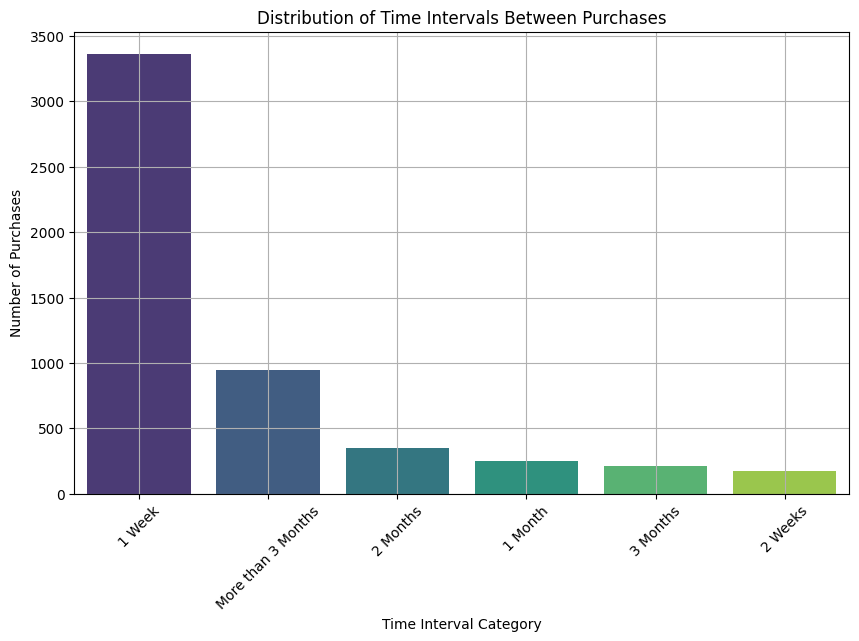

In [34]:
plt.figure(figsize=(10, 6))
sns.barplot(x='time_category', y='count', data=time_distribution, palette='viridis')
plt.title('Distribution of Time Intervals Between Purchases')  # 'Distribusi Jarak Waktu antara Pembelian'
plt.xlabel('Time Interval Category')  # 'Kategori Jarak Waktu'
plt.ylabel('Number of Purchases')  # 'Jumlah Pembelian'
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


Summary Insight :
- Weekly Purchases: The majority of repeat buyers, 3,363 (a significant proportion), make purchases every week. This indicates that these customers have a high frequency of buying behavior.

- Purchases Every 1 to 3 Months: A smaller segment of repeat buyers, with 944 making purchases more than 3 months apart and 351 making purchases every 2 months, reflects a lower but still notable frequency of repeat buying.

- Less Frequent Purchases: Purchases occurring every 1 month and 3 months are less common, with 254 and 214 repeat buyers respectively. This suggests that these customers might have less frequent, but still regular, purchasing patterns.

- Two Weeks Purchases: The least common interval is every 2 weeks, with 174 repeat buyers. This is the smallest group, showing that very short-term repeat purchases are less frequent among repeat buyers.

##### **4.10 Shipment performance to Customer Satisfaction**


This analysis is the further step to know the cause of negative reviews for both type of customers (first-time buyers and repeat buyers). 

Question to this analysis is "Does shipment performance affect on customer negative reviews?"

By answering this we could analyzing the cause of this problem, so company could take a right treatment to solve the customer retention rate by improving the customer satisfactio

    4.10.1. Overall Shipment Performace 

In [35]:
shipment = df_olist.copy()

shipment['order_delivered_customer_date'] = pd.to_datetime(shipment['order_delivered_customer_date'])
shipment['order_estimated_delivery_date'] = pd.to_datetime(shipment['order_estimated_delivery_date'])

# Calculate the time difference
shipment['time_difference'] = shipment['order_delivered_customer_date'] - shipment['order_estimated_delivery_date']

# Calculate the number of on-time and late shipments
on_time_shipments = shipment[shipment['time_difference'] <= pd.Timedelta(0)].shape[0]
late_shipments = shipment[shipment['time_difference'] > pd.Timedelta(0)].shape[0]


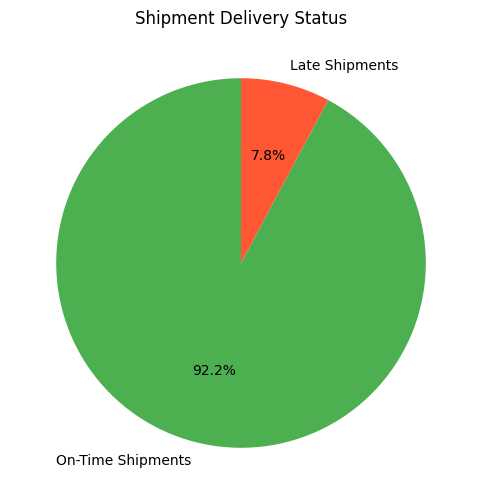

In [36]:
# Data for the pie chart
labels = ['On-Time Shipments', 'Late Shipments']
sizes = [on_time_shipments, late_shipments]
colors = ['#4CAF50', '#FF5733']  # Green for on-time, red for late

# Create the pie chart
plt.figure(figsize=(8, 6))
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90)
plt.title('Shipment Delivery Status')
plt.show()

Summary Insight :

- Based on the analysis results, the delivery performance can be considered good. The pie chart shows that 92.2% of deliveries are on time, while only 7.8% are delayed. A deeper analysis will be conducted based on the review scores given by customers to get a more comprehensive understanding.

    4.10.2 Correlation to Review Results with the Order Time Metrics

In [37]:
to_dt = ['order_estimated_delivery_date','order_approved_at','order_delivered_customer_date','order_purchase_timestamp']

order_reviews = df_olist.copy()

order_reviews['order_approved_at']  = pd.to_datetime(order_reviews['order_approved_at'],format='mixed', errors='coerce')
order_reviews['order_estimated_delivery_date']  = pd.to_datetime(order_reviews['order_estimated_delivery_date'],format='mixed', errors='coerce')
order_reviews['order_delivered_customer_date']  = pd.to_datetime(order_reviews['order_delivered_customer_date'],format='mixed', errors='coerce')
order_reviews['order_purchase_timestamp']  = pd.to_datetime(order_reviews['order_purchase_timestamp'],format='mixed', errors='coerce')

# making the metrics
order_reviews['purchase to approval (seconds)'] =  (order_reviews['order_approved_at'] - order_reviews['order_purchase_timestamp']).dt.seconds
order_reviews['purchase to approval (days)'] =  (order_reviews['order_approved_at'] - order_reviews['order_purchase_timestamp']).dt.days
order_reviews['approval to delivered'] =  (order_reviews['order_delivered_customer_date'] - order_reviews['order_approved_at']).dt.days
order_reviews['purchase to delivered'] =  (order_reviews['order_delivered_customer_date'] - order_reviews['order_purchase_timestamp']).dt.days
order_reviews['estimation accuracy'] =  (order_reviews['order_delivered_customer_date'] - order_reviews['order_estimated_delivery_date']).dt.days

order_reviews = order_reviews[['review_score','purchase to approval (seconds)', 'approval to delivered','purchase to delivered', 'estimation accuracy']]

,review_score
review_score,1.000000
purchase to approval (seconds),-0.010952
approval to delivered,-0.296696
purchase to delivered,-0.297505
estimation accuracy,-0.224065


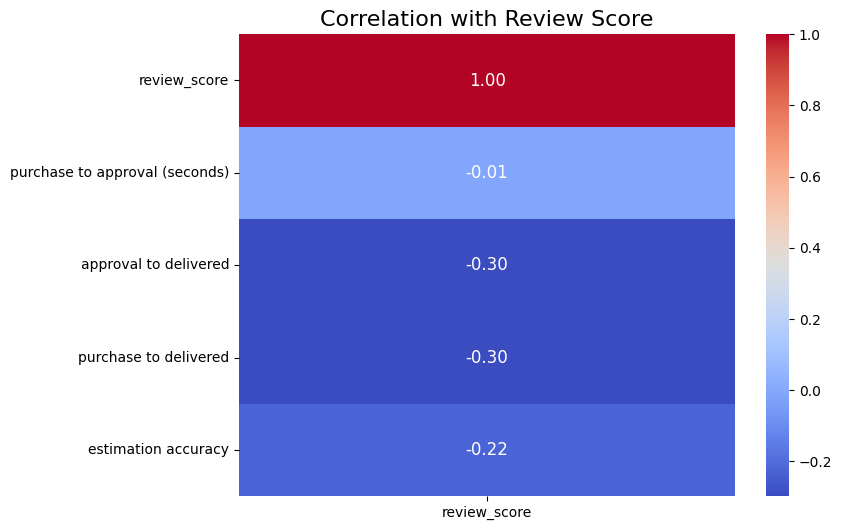

In [38]:
corr_matrix = order_reviews.corr(method='pearson', numeric_only=True)['review_score'].to_frame()


display(corr_matrix)

plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', cbar=True, fmt='.2f', annot_kws={'size': 12})

plt.title('Correlation with Review Score', fontsize=16)
plt.show()

Summary Insight : 

- Purchase to Approval Time (seconds): There is a very weak negative correlation of -0.011 with review_score, indicating almost no relationship between the time taken to approve a purchase and the customer’s review score.

- Approval to Delivered Time: This metric has a moderate negative correlation of -0.297 with review_score. It suggests that longer delivery times after approval are associated with lower review scores.

- Purchase to Delivered Time: Similarly, the overall time from purchase to delivery also shows a moderate negative correlation of -0.298. Longer total delivery times seem to lead to lower customer satisfaction, as reflected in the review scores.

- Estimation Accuracy: The correlation of -0.224 with review_score suggests that the closer the actual delivery time is to the estimated delivery time, the better the review score tends to be. Inaccurate delivery estimates negatively impact customer satisfaction.

Overall, the analysis indicates that delivery-related times, particularly delays, have a noticeable impact on customer satisfaction, with longer times leading to lower review scores.

    4.10.3 Shipment Performace to Review Score

In [39]:
# Determine on-time and late status
shipment['delivery_status'] = shipment['time_difference'].apply(lambda x: 'On-Time' if x <= pd.Timedelta(0) else 'Late')

# Calculate the proportion of on-time and late shipments for each review score
proportions = shipment.groupby(['review_score', 'delivery_status']).size().unstack().fillna(0)
proportions = proportions.apply(lambda x: x / x.sum(), axis=1)


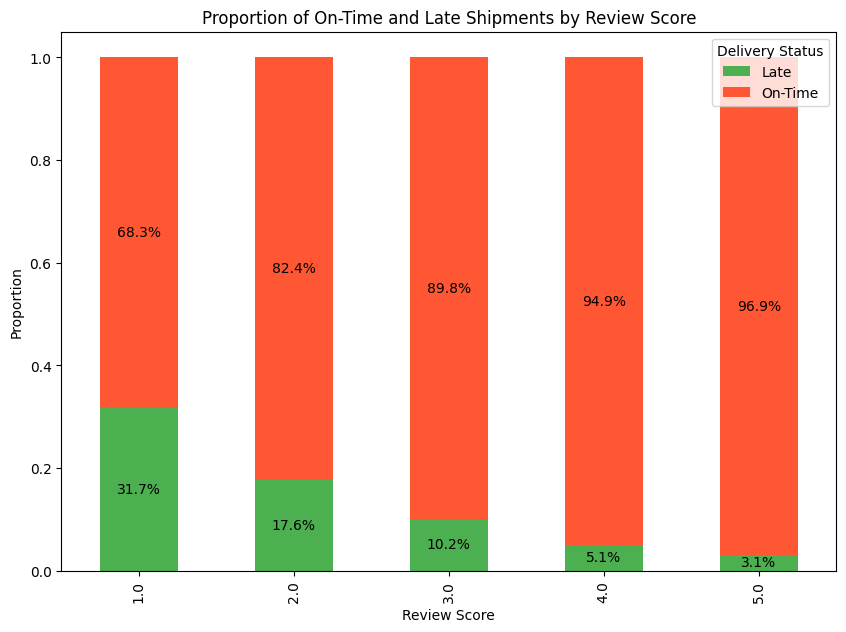

In [40]:
ax = proportions.plot(kind='bar', stacked=True, color=['#4CAF50', '#FF5733'], figsize=(10, 7))

for p in ax.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy() 
    ax.text(x + width / 2, 
            y + height / 2, 
            f'{height:.1%}', 
            ha='center', 
            va='center')
plt.title('Proportion of On-Time and Late Shipments by Review Score')
plt.xlabel('Review Score')
plt.ylabel('Proportion')
plt.legend(title='Delivery Status')
plt.show()



Summary Insight:

- Shipments with a review score of 1.0 have a significant delay rate of 31.7%. This indicates that nearly one-third of the shipments with the lowest scores experience delays.

- Review score 1.0 stands out as the category with the highest delay rate compared to other scores. This suggests that delivery delays directly impact customer satisfaction and lead them to give the lowest scores.

Recommendation : 
-  Implement measures to streamline logistics processes, improve inventory management, and ensure timely order fulfillment. This will help in minimizing delays and improving overall service efficiency.

    4.10.4 Customer Satisfaction Based On Comment Review 

After conducting an analysis based on customer satisfaction levels in review score 1, it was found that delivery issues only affected 31% of customer satisfaction. The remaining 60%+ of customers were dissatisfied for reasons other than delayed shipments. To identify the root causes, a deeper analysis of the comments provided by customers is necessary. Therefore, for this analysis, only data with a review score of 1 and an on-time delivery status will be selected.

In [41]:
# filter only comment with the on-time delivery and review score 1 to 3
low_score_review = shipment[shipment['delivery_status'] == 'On-Time']

low_score_review = shipment[shipment['review_score']  < 4]

In [42]:
# Droping all the Nan value comments
low_score_review.dropna(inplace=True)

C:\Users\user\AppData\Local\Temp\ipykernel_6732\912797775.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  low_score_review.dropna(inplace=True)


In [43]:
import re
import nltk
from wordcloud import WordCloud
from nltk.corpus import stopwords
from googletrans import Translator
from sklearn.feature_extraction.text import CountVectorizer

# Initialize the stopwords set 
stop_words = set(stopwords.words('portuguese'))

# Preprocess comments
comments = []
for words in low_score_review['review_comment_message']:
    # Keep accented characters and important punctuation
    only_letters = re.sub(r"[^a-zA-ZÀ-ÿ0-9\s.,!']", " ", words)
    tokens = nltk.word_tokenize(only_letters)  # Tokenize the sentences
    lower_case = [l.lower() for l in tokens]  # Convert all letters to lower case
    filtered_result = [l for l in lower_case if l not in stop_words]  # Remove stopwords
    comments.append(' '.join(filtered_result))

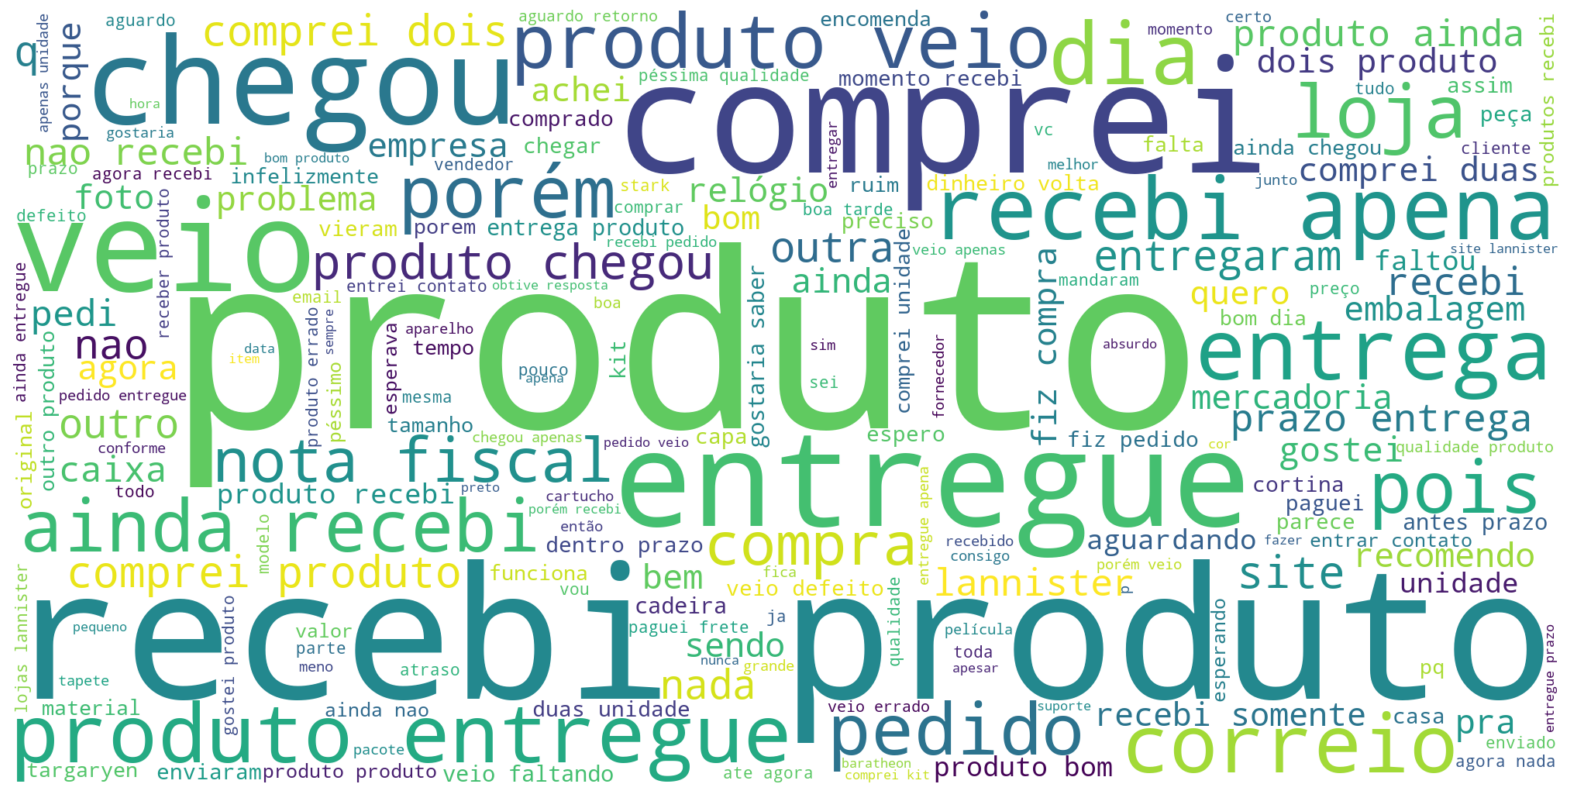

In [44]:
# Visualize comments using WordCloud
unique_string = " ".join(comments)
wordcloud = WordCloud(width=2000, height=1000, background_color='white').generate(unique_string)
plt.figure(figsize=(20, 12))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()


In [45]:

# Initialize CountVectorizer for trigrams
co = CountVectorizer(ngram_range=(3, 3))
counts = co.fit_transform(comments)

# Create DataFrame for trigrams
important_trigrams = pd.DataFrame(counts.sum(axis=0).A1, columns=['frequency'], index=co.get_feature_names_out()).sort_values('frequency', ascending=False).head(50)

important_trigrams = important_trigrams.reset_index()
important_trigrams.rename(columns={'index': 'trigrams'}, inplace=True)

translator = Translator()

def translate_text(text):
    try:
        translated = translator.translate(text, src='pt', dest='en').text
    except Exception as e:
        print(f"Error translating {text}: {e}")
        translated = text
    return translated

important_trigrams['english_translation'] = important_trigrams['trigrams'].apply(translate_text)

important_trigrams.head(10)


,trigrams,frequency,english_translation
0,ainda recebi produto,225,I still received product
1,nao recebi produto,136,I didn't receive a product
2,comprei dois produtos,98,I bought two products
3,ainda nao recebi,69,I haven't received it yet
4,comprei duas unidades,69,I bought two units
5,produto ainda entregue,62,Product still delivered
6,produto veio defeito,60,Product came defect
7,produto ainda chegou,60,Product still arrived
8,quero dinheiro volta,58,I want money back
9,produto péssima qualidade,57,Poor Quality Product


Summary Insight :
- Based on the analysis of customer review comments, in addition to complaints caused by shipment delays, other issues include customers not receiving the product even though it is marked as delivered, buying 2 items and only receiving 1, products arriving with defects, poor product quality, and products still being shipped even though the status is already delivered.

Action : 

- Enhance logistics and shipment tracking systems to ensure accurate delivery status updates.
- Implement a robust verification process to ensure all items ordered are delivered.
- Provide clear channels for customers to report issues and receive timely assistance.
- Continuously monitor customer feedback to identify recurring issues and areas for improvement.

Recommendation :
- Partner with reliable shipping carriers and implement real-time tracking for customers. Invest in technology to verify delivery confirmations and reduce discrepancies between delivery status and actual receipt.
- Enhance customer service by offering multiple contact options, such as chat, email, and phone support. Train support staff to handle complaints effectively and resolve issues quickly.
- Use analytics tools to track common complaints and trends in customer reviews. Regularly review and address these issues to enhance overall customer satisfaction.



#### **4.11. Cohort Analysis For Customer Retention Rate**

In [46]:
cohort = df_olist[['customer_unique_id', 'order_id', 'order_purchase_timestamp', 'product_category_name', 'customer_state']].drop_duplicates()

In [47]:
# Convert the 'order_purchase_timestamp' to datetime
cohort['order_purchase_timestamp'] = pd.to_datetime(cohort['order_purchase_timestamp'])

# Now, you can create 'OrderMonth' and 'CohortGroup'
cohort['OrderMonth'] = cohort['order_purchase_timestamp'].dt.to_period('M')
cohort['CohortGroup'] = cohort.groupby('customer_unique_id')['order_purchase_timestamp'] \
                 .transform('min') \
                 .dt.to_period('M')


In [48]:
from operator import attrgetter
import matplotlib.colors as mcolors
df_cohort = cohort.groupby(['CohortGroup', 'OrderMonth']) \
              .agg(n_customers=('customer_unique_id', 'count')) \
              .reset_index(drop=False)
df_cohort['PeriodIndex'] = (df_cohort.OrderMonth - df_cohort.CohortGroup).apply(attrgetter('n'))

def get_data(df_cohort):
    cohort_pivot = df_cohort.pivot_table(index = 'CohortGroup',
                                     columns = 'PeriodIndex',
                                     values = 'n_customers')
    cohort_pivot = cohort_pivot.iloc[4:-1,:-5]
    return cohort_pivot

cohort_pivot_ = get_data(df_cohort)
cohort_pivot_

PeriodIndex,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
CohortGroup,,,,,,,,,,,,,,,
2017-02,1611.0,3.0,5.0,1.0,7.0,2.0,4.0,3.0,2.0,3.0,2.0,5.0,2.0,3.0,2.0
2017-03,2500.0,12.0,9.0,11.0,9.0,4.0,4.0,8.0,8.0,2.0,8.0,4.0,5.0,3.0,5.0
2017-04,2239.0,15.0,6.0,5.0,6.0,6.0,8.0,7.0,7.0,4.0,6.0,2.0,1.0,1.0,2.0
2017-05,3461.0,17.0,15.0,10.0,10.0,12.0,15.0,5.0,8.0,11.0,9.0,10.0,8.0,1.0,6.0
2017-06,3055.0,16.0,12.0,13.0,10.0,12.0,10.0,7.0,4.0,5.0,9.0,11.0,5.0,6.0,10.0
2017-07,3815.0,24.0,13.0,9.0,12.0,8.0,12.0,4.0,8.0,11.0,9.0,12.0,5.0,9.0,NaN
2017-08,4113.0,29.0,17.0,11.0,14.0,22.0,12.0,11.0,6.0,6.0,10.0,8.0,4.0,NaN,NaN
2017-09,4041.0,28.0,20.0,16.0,19.0,12.0,10.0,10.0,11.0,7.0,10.0,3.0,NaN,NaN,NaN
2017-10,4361.0,32.0,11.0,3.0,11.0,9.0,10.0,17.0,13.0,8.0,9.0,NaN,NaN,NaN,NaN


In [49]:
cohort_size = cohort_pivot_.iloc[:,0]
retention_matrix = cohort_pivot_.divide(cohort_size, axis = 0)

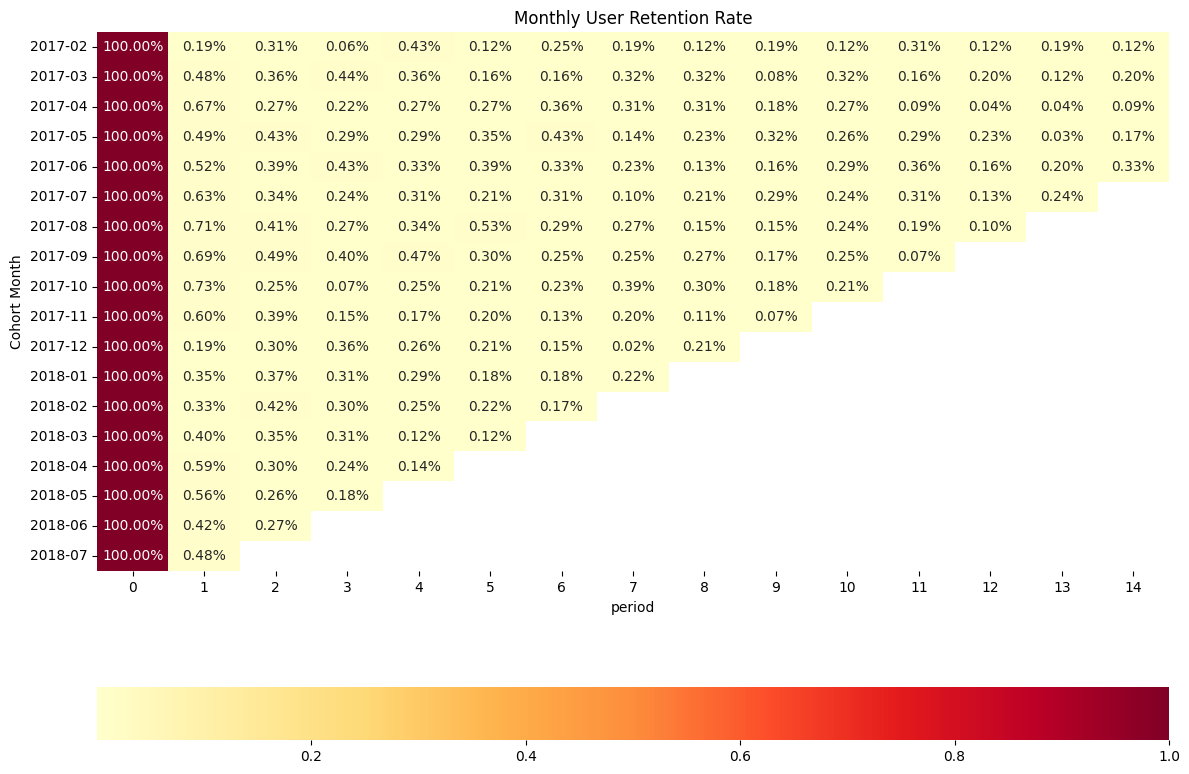

In [50]:
# Plot retention rate dengan cohort
plt.figure(figsize=(12,8))
sns.heatmap(retention_matrix,
            annot=True,
            fmt='.2%',
            cmap='YlOrRd',
            cbar_kws={'orientation':'horizontal'})
plt.tight_layout()
plt.xlabel('period')
plt.ylabel('Cohort Month')
plt.title('Monthly User Retention Rate')
plt.show()

summary insight :

-  After customers make a purchase on their first transaction day, they tend not to make additional purchases in the following months.

- The percentage of customers who make subsequent transactions is very low, ranging from 0 to 1%.

- There is a sharp decline in customer retention over time. While initial purchases are strong, with thousands of customers per cohort, the number of repeat purchases drops significantly in subsequent periods. For instance, the February 2017 cohort started with 1,611 customers but only retained 3 in the second period and fluctuates at very low levels thereafter. 

- This pattern suggests that while customer acquisition is successful, **retention efforts need significant improvement** to maintain ongoing customer engagement and repeat business.

#### **4.12. Revenue Growth Analysis**

    4.12.1. Yearly Revenue Growth From 2016 - 2018

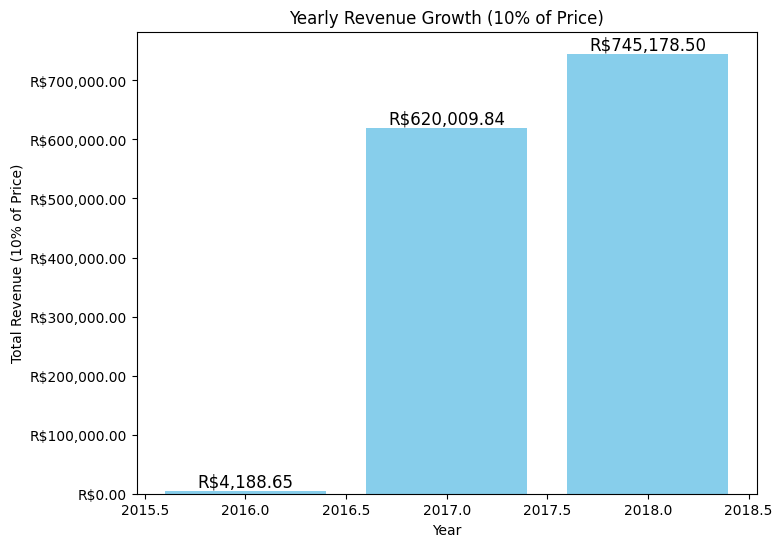

In [51]:
from matplotlib.ticker import FuncFormatter

yearly_revenue = df_olist.copy()
yearly_revenue['revenue_year'] = pd.to_datetime(yearly_revenue['order_purchase_timestamp']).dt.year
yearly_revenue['revenue'] = yearly_revenue['price'] * 0.10


yearly_revenue_growth = yearly_revenue.groupby('revenue_year')['revenue'].sum().reset_index()

plt.figure(figsize=(8, 6))
bars = plt.bar(yearly_revenue_growth['revenue_year'], yearly_revenue_growth['revenue'], color='skyblue')

def currency_formatter(x, pos):
    return f'R${x:,.2f}'

plt.gca().yaxis.set_major_formatter(FuncFormatter(currency_formatter))

for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2.0, height, f'R${height:,.2f}', ha='center', va='bottom', fontsize=12)

plt.title('Yearly Revenue Growth (10% of Price)')
plt.xlabel('Year')
plt.ylabel('Total Revenue (10% of Price)')
plt.xticks(rotation=0)
plt.show()


    4.12.2. Montly Revenue Growth From 2016 - 2018

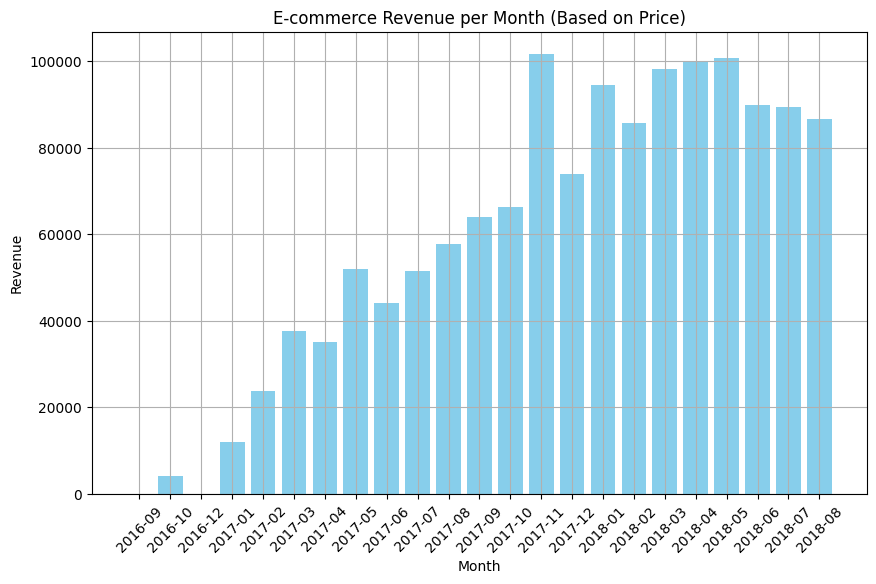

In [52]:
montly_revenue = df_olist.copy()

montly_revenue['order_purchase_timestamp'] = pd.to_datetime(montly_revenue['order_purchase_timestamp'])

montly_revenue['purchase_month'] = montly_revenue['order_purchase_timestamp'].dt.to_period('M')

monthly_sales = montly_revenue.groupby('purchase_month')['price'].sum().reset_index()

monthly_sales['revenue'] = monthly_sales['price'] * 0.10

plt.figure(figsize=(10, 6))
plt.bar(monthly_sales['purchase_month'].astype(str), monthly_sales['revenue'], color='skyblue')
plt.title('E-commerce Revenue per Month (Based on Price)')
plt.xlabel('Month')
plt.ylabel('Revenue')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


    4.12.3. One-Time and Repeat Buyers on Revenue Contribution

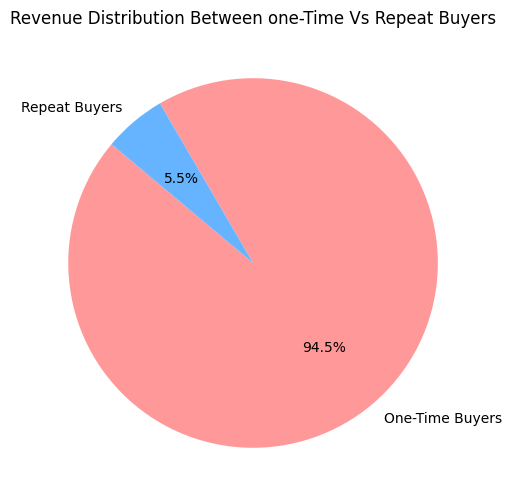

In [53]:
# 1. Total revenue from one-time buyers
duplicated_orders = one_customers[one_customers.duplicated(subset=['order_id', 'order_item_id'], keep=False)]
unique_orders = one_customers.drop(duplicated_orders.index)
duplicated_orders = duplicated_orders.drop_duplicates(subset=['order_id', 'order_item_id'])
final_df = pd.concat([unique_orders, duplicated_orders])
one_time_revenue = final_df['price'].sum() * 0.10

# 2. Total revenue from repeat buyers
duplicated_orders = repeat_customers[repeat_customers.duplicated(subset=['order_id', 'order_item_id'], keep=False)]
unique_orders = repeat_customers.drop(duplicated_orders.index)
duplicated_orders = duplicated_orders.drop_duplicates(subset=['order_id', 'order_item_id'])
final_df = pd.concat([unique_orders, duplicated_orders])
repeat_revenue = final_df['price'].sum() * 0.10

# Data for pie chart
labels = ['One-Time Buyers', 'Repeat Buyers']
sizes = [one_time_revenue, repeat_revenue]
colors = ['#ff9999','#66b3ff']

# Create pie chart
plt.figure(figsize=(8, 6))
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140)
plt.title('Revenue Distribution Between one-Time Vs Repeat Buyers')
plt.show()


Summary Insight :

- One-time buyers make up 97% of the customer base but contribute 94.5% of the revenue, while repeat buyers, though only 3% of customers, generate 5.5% of the revenue. 

- This indicates that repeat buyers, despite their small percentage, have a higher value per purchase, highlighting the importance of strategies to convert one-time buyers into repeat customers to boost overall revenue.